In [1]:
import numpy as np
import math
import array as arr
import matplotlib.pyplot as plt
import csv
import statistics

In [2]:
#import data
data = np.genfromtxt('TOTAL.a.csv',skip_footer=1, names=True, dtype=None, delimiter=',')

C:\Users\katel\AppData\Local\Temp\ipykernel_12864\3209501774.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt('TOTAL.a.csv',skip_footer=1, names=True, dtype=None, delimiter=',')


In [3]:
data.dtype

dtype([('2MASS_ID', 'S19'), ('RA', 'S7'), ('DEC', 'S12'), ('RAd', '<f8'), ('DEd', '<f8'), ('GL', '<f8'), ('GB', '<f8'), ('UTD', 'S9'), ('FILE', 'S35'), ('V_HEL', '<f8'), ('TDR', '<f8'), ('CORR', '<f8'), ('E_RV', '<f8'), ('SIGMA', '<f8'), ('NUM', '<i4'), ('CA1', '<f8'), ('E_CA1', '<f8'), ('CA2', '<f8'), ('E_CA2', '<f8'), ('CA3', '<f8'), ('E_CA3', '<f8'), ('RA2', 'S7'), ('2Dec', 'S12'), ('tmpR', '<f8'), ('Lambda', '<i4'), ('Beta', '<i4'), ('V_LSR', '<f8'), ('V_GSR', '<f8'), ('RA3', '<f8'), ('3Dec', '<f8'), ('J', '<f8'), ('H', '<f8'), ('K', '<f8'), ('E_J', '<f8'), ('E_H', '<f8'), ('E_K', '<f8'), ('rdflg', '<i4'), ('ccflg', 'S3'), ('phqu', 'S3'), ('prx', '<f8'), ('2Mdate', 'S10'), ('d_opt', '<f8'), ('p_opt', '<i4'), ('a', 'S1'), ('ermaj', '<f8'), ('id', '<i4'), ('R', '<f8'), ('ER', '<f8'), ('2MASS', 'S16'), ('RA4', 'S7'), ('4Dec', 'S12'), ('JNK1', '<f8'), ('JNK2', '<f8'), ('JNK3', '<f8'), ('JNK4', '<f8'), ('JNK5', '<f8'), ('JNK6', '<f8'), ('JNK7', '<f8'), ('JNK8', '<f8'), ('JNK9', '<f8'), 

In [4]:
dot=data['2MASS_ID']
feh = data['FE_H']
teff = data['TEFF']
for i in range(0,1633):
    print("[Fe/H] Abundance for", dot[i], "is", feh[i], 'at temperature', teff[i], 'K')


[Fe/H] Abundance for b'Sgr18541047-3026161' is -0.706272677 at temperature 3868.26092 K
[Fe/H] Abundance for b'Sgr18541810-3029314' is -0.200823647 at temperature 4453.294159 K
[Fe/H] Abundance for b'Sgr18543205-3047488' is -0.474859671 at temperature 3837.325871 K
[Fe/H] Abundance for b'Sgr18550269-3045523' is -0.107639905 at temperature 3958.551451 K
[Fe/H] Abundance for b'Sgr18550257-3025397' is -1.079467787 at temperature 4244.533643 K
[Fe/H] Abundance for b'Sgr18542551-3039455' is -0.352663998 at temperature 4481.851774 K
[Fe/H] Abundance for b'Sgr18545211-3024229' is -0.262581802 at temperature 4585.860597 K
[Fe/H] Abundance for b'Sgr18542283-3051089' is -0.5977636 at temperature 4045.146552 K
[Fe/H] Abundance for b'Sgr18553060-3047381' is -0.162320934 at temperature 3926.63409 K
[Fe/H] Abundance for b'Sgr18552942-3034507' is -0.557113159 at temperature 3945.481364 K
[Fe/H] Abundance for b'Sgr18553188-3041275' is -0.724756214 at temperature 3728.400925 K
[Fe/H] Abundance for b'Sg

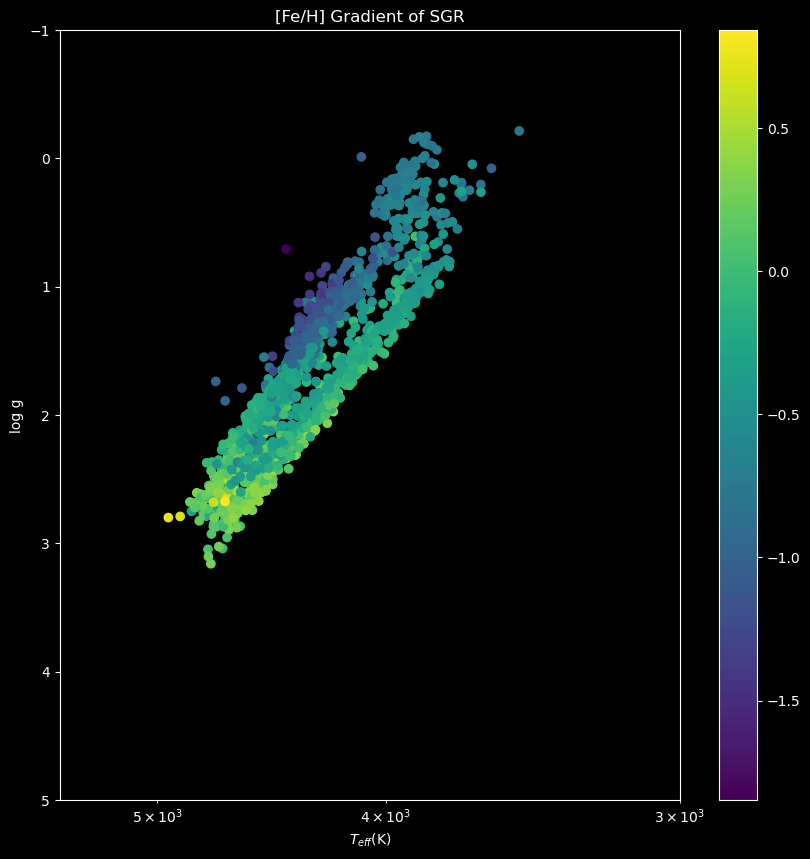

In [5]:
#plot the fe/h 
plt.style.use('dark_background')
fig = plt.figure(figsize=(10,10))

x=plt.scatter(data['TEFF'], data['LOGG'], c= data['FE_H'], cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[Fe/H] Gradient of SGR')
bar = fig.colorbar(x)

plt.xscale('log')
plt.xlim([5.5e3,3e3])
plt.ylim([5,-1])

plt.show()

In [6]:
#mask the irrelevangt data from the real data
cut = (data['TDR']>11) & (data['V_HEL']>80)

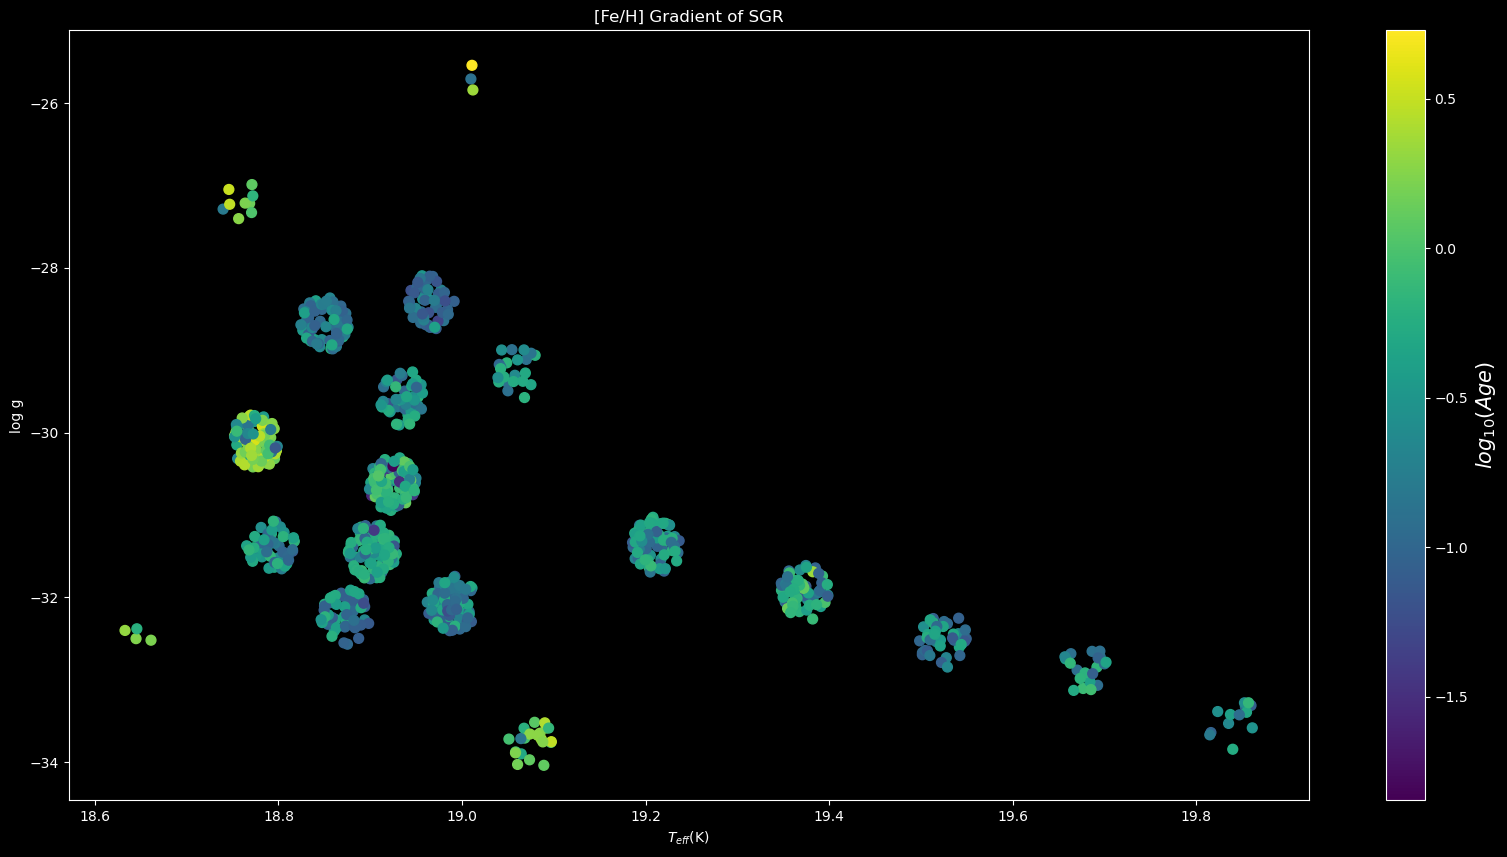

In [7]:
#plot SGR w/o irrelevant data atcorrespondong RA and DEC points 
plt.style.use('dark_background')
fig = plt.figure(figsize=(20,10))

x=plt.scatter(data['RAd'][cut], data['DEd'][cut], c= data['FE_H'][cut], s=50, cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[Fe/H] Gradient of SGR')

bar = fig.colorbar(x)
bar.set_label('$log_{10} (Age)$', size=15)

plt.show()

In [8]:
data['FILENAME3'] 

array([b'f1.Sgr.major.plus.00_2.0001.nfsgr2',
       b'f1.Sgr.major.plus.00_2.0004.nfsgr2',
       b'f1.Sgr.major.plus.00_2.0005.nfsgr2', ...,
       b'f7.Sgr.minor.plus.01.0133.nfsgr2.st',
       b'f7.Sgr.minor.plus.01.0134.nfsgr2.st',
       b'f7.Sgr.minor.plus.01.0135.nfsgr2.st'], dtype='|S35')

In [9]:
# want to signal the central field point for [FE/H]
major00 = (data['MAJOR'] == 0) & (data['MINOR'] == 0)
m00 = data['FE_H'][major00]
major00_mean = np.mean(m00)

major02 = (data['MAJOR'] == 2) & (data['MINOR'] == 0)
m02 = data['FE_H'][major02]
major02_mean = np.mean(m02)

major04 = (data['MAJOR'] == 4 ) & (data['MINOR'] == 0)
m04 = data['FE_H'][major04]
major04_mean = np.mean(m04)

major06 = (data['MAJOR'] == 6) & (data['MINOR'] == 0)
m06 = data['FE_H'][major06]
major06_mean = np.mean(m06)

major08 = (data['MAJOR'] == 8 ) & (data['MINOR'] == 0)
m08 = data['FE_H'][major08]
major08_mean = np.mean(m08)

major10 = (data['MAJOR'] == 10 ) & (data['MINOR'] == 0)
m10 = data['FE_H'][major10]
major10_mean = np.mean(m10)

major12 = (data['MAJOR'] == 12 ) & (data['MINOR'] == 0)
m12 = data['FE_H'][major12]
major12_mean = np.mean(m12)

minor_01= (data['MAJOR'] == 0) & (data['MINOR'] == 1)
m_01 = data['FE_H'][minor_01]
minor_01_mean = np.mean(m_01)

minor_02= (data['MAJOR'] == 0) & (data['MINOR'] == 2)
m_02 = data['FE_H'][minor_02]
minor_02_mean = np.mean(m_02)

minor_05= (data['MAJOR'] == 0) & (data['MINOR'] == 5)
m_05 = data['FE_H'][minor_05]
minor_05_mean = np.mean(m_05)

major_m_02 = (data['MAJOR'] == -2) & (data['MINOR'] == 0)
mm_02 = data['FE_H'][major_m_02]
major_m_02_mean = np.mean(mm_02)

minor_m_01= (data['MAJOR'] == 0) & (data['MINOR'] == -1)
m_m01 = data['FE_H'][minor_m_01]
minor_m_01_mean = np.mean(m_m01)

minor_m_02= (data['MAJOR'] == 0) & (data['MINOR'] == -2)
m_m02 = data['FE_H'][minor_m_02]
minor_m_02_mean = np.mean(m_m02)

minor_m_03= (data['MAJOR'] == 0) & (data['MINOR'] == -3)
m_m03 = data['FE_H'][minor_m_03]
minor_m_03_mean = np.mean(m_m03)

SW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == -2)
SW4 = data['FE_H'][SW_04]
SW_04_mean = np.mean(SW4)

NW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == 2)
NW4 = data['FE_H'][NW_04]
NW_04_mean = np.mean(NW4)

SE_04 = (data['MAJOR'] == 2) & (data['MINOR'] == -2)
SE4 = data['FE_H'][SE_04]
SE_04_mean = np.mean(SE4)

NE_02 = (data['MAJOR'] == 1.4) & (data['MINOR'] == 1.4)
NE2 = data['FE_H'][NE_02]
NE_02_mean = np.mean(NE2)

SW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == -1.4)
SW2 = data['FE_H'][SW_02]
SW_02_mean = np.mean(SW2)

NW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
NW2 = data['FE_H'][NW_02]
NW_02_mean = np.mean(NW2)

SE_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
SE2 = data['FE_H'][SE_02]
SE_02_mean = np.mean(SE2)


In [10]:

#nbins = int((np.max(data['MG_FE'])+0.05 - np.min(data['MG_FE'])-0.05)/0.05)
#print(nbins)

15


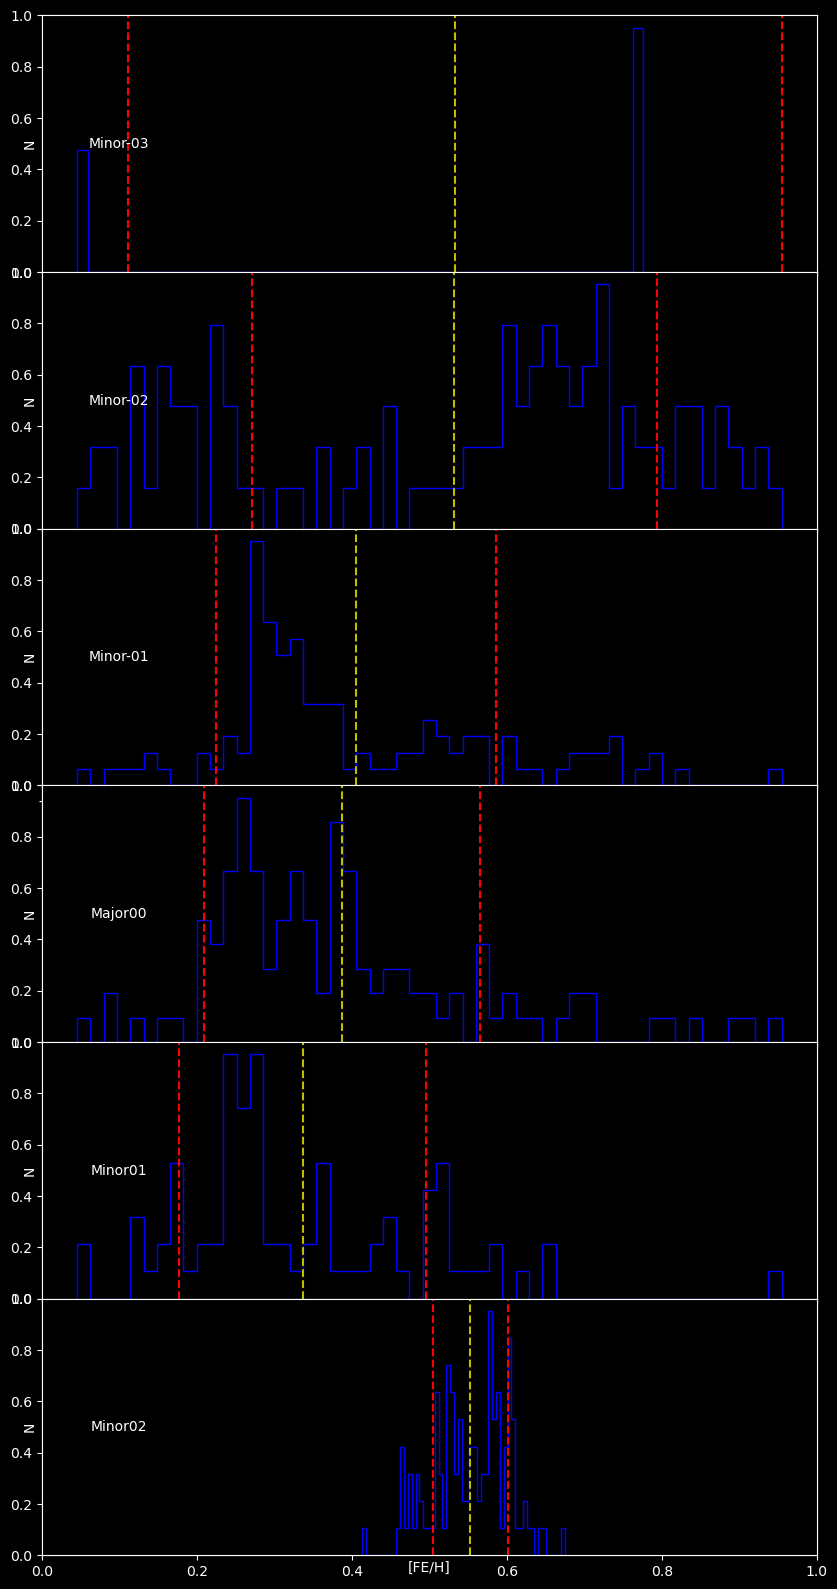

In [75]:
#plot the histograms
plt.style.use('dark_background')
fig, axes = plt.subplots(6, 1, figsize=(10,20), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax1 = fig.add_subplot(6,1,1)
ax1.hist(m_m03,bins=53, histtype='step', color='b')
ax1.text(0.1, 0.5, 'Minor-03', 
         horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax1.set_ylabel('N')
ax1.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m_m03)

plt.axvline(minor_m_03_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_03_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_03_mean + sd, c='r', linestyle='dashed')
###################################################################################
ax2 = fig.add_subplot(6,1,2)
ax2.hist(m_m02,bins=53, histtype='step', color='b')
ax2.text(0.1, 0.5, 'Minor-02', 
         horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax2.set_ylabel('N')
ax2.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m_m02)

plt.axvline(minor_m_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_02_mean + sd, c='r', linestyle='dashed')

#############################################################################################
#plot the histograms

ax3 = fig.add_subplot(6,1,3)
ax3.hist(m_m01,bins=53, histtype='step', color='b')
ax3.text(0.1, 0.5, 'Minor-01', 
         horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
ax3.set_ylabel('N')
ax3.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m_m01)

plt.axvline(minor_m_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_01_mean + sd, c='r', linestyle='dashed')
#################################################################################################
ax4 = fig.add_subplot(6,1,4)
ax4.hist(m00,bins=53, histtype='step', color='b')
ax4.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
ax4.set_ylabel('N')
ax4.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#####################################################################################################
#plot the histograms

ax5 = fig.add_subplot(6,1,5)
ax5.hist(m_01,bins=53, histtype='step', color='b')
ax5.text(0.1, 0.5, 'Minor01', 
         horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
ax5.set_ylabel('N')
ax5.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_01_mean + sd, c='r', linestyle='dashed')
#######################################################################################
#plot the histograms

ax6 = fig.add_subplot(6,1,6)
ax6.hist(m_02,bins=53, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Minor02', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.set_ylabel('N')
ax6.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_02_mean + sd, c='r', linestyle='dashed')


ax6.set_xlim(-1, 1) 
ax6.set_xticks([])

ax1.set_yticks([])
ax2.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])

plt.show()

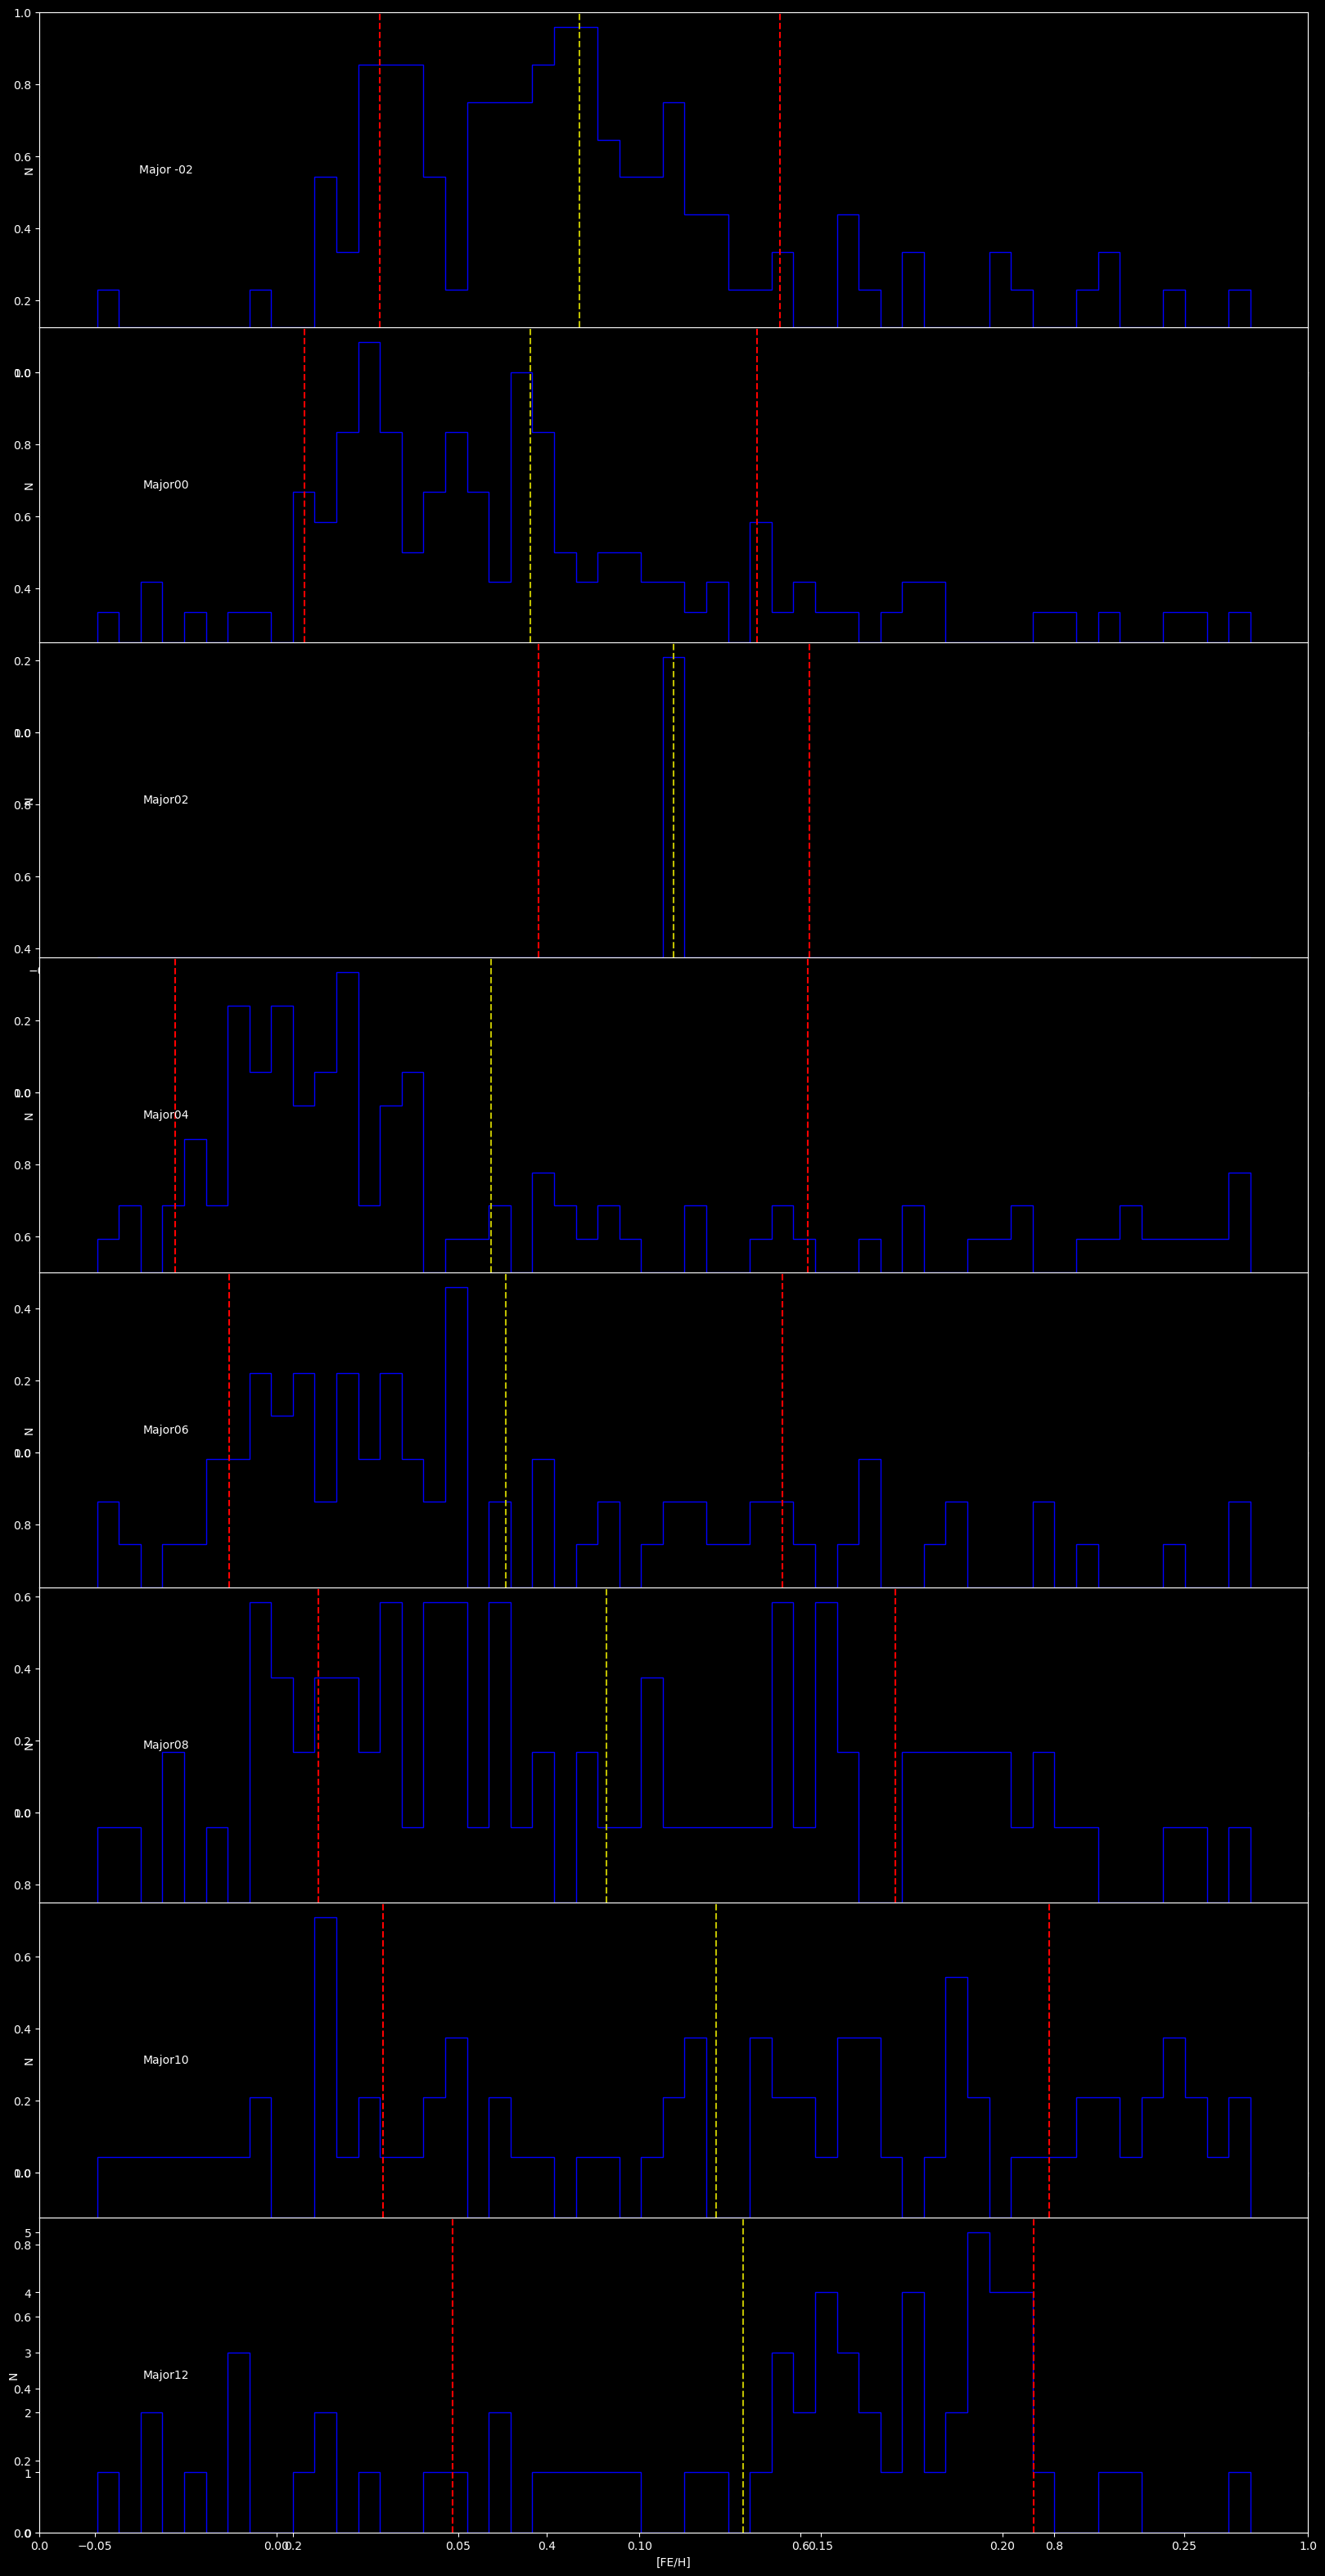

In [62]:
#number of historgrams to display
num_hist = 20

#plot the histograms
plt.style.use('dark_background')
fig, axes = plt.subplots(7, 1, figsize=(10,5), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
###################################################################################

#####################################################################################################

ax6 = fig.add_subplot(8,1,1)
ax6.hist(mm_02,bins=53, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Major -02', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.set_ylabel('N')
ax6.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(mm_02)

plt.axvline(major_m_02_mean, c='y', linestyle='dashed')
plt.axvline(major_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(major_m_02_mean + sd, c='r', linestyle='dashed')

#####################################################################################################
ax7 = fig.add_subplot(8,1,2)
ax7.hist(m00,bins=53, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')
ax7.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################################################################
ax8 = fig.add_subplot(8,1,3)
ax8.hist(m02,bins=53, histtype='step', color='b')
ax8.text(0.1, 0.5, 'Major02', 
         horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes)
ax8.set_ylabel('N')
ax8.set_xlabel('[FE/H]')

#standard deviatian and mean
#sd = statistics.stdev(m02)

plt.axvline(major02_mean, c='y', linestyle='dashed')
plt.axvline(major02_mean - sd, c='r', linestyle='dashed')
plt.axvline(major02_mean+ sd, c='r', linestyle='dashed')
#####################################################################################################
ax9 = fig.add_subplot(8,1,4)
ax9.hist(m04,bins=53, histtype='step', color='b')
ax9.text(0.1, 0.5, 'Major04', 
         horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)
ax9.set_ylabel('N')
ax9.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m04)

plt.axvline(major04_mean, c='y', linestyle='dashed')
plt.axvline(major04_mean - sd, c='r', linestyle='dashed')
plt.axvline(major04_mean+ sd, c='r', linestyle='dashed')
###################################################################################
ax10 = fig.add_subplot(8,1,5)
ax10.hist(m06,bins=53, histtype='step', color='b')
ax10.text(0.1, 0.5, 'Major06', 
         horizontalalignment='center', verticalalignment='center', transform=ax10.transAxes)
ax10.set_ylabel('N')
ax10.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m06)

plt.axvline(major06_mean, c='y', linestyle='dashed')
plt.axvline(major06_mean - sd, c='r', linestyle='dashed')
plt.axvline(major06_mean+ sd, c='r', linestyle='dashed')

###############################################################################################
ax11 = fig.add_subplot(8,1,6)
ax11.hist(m08,bins=53, histtype='step', color='b')
ax11.text(0.1, 0.5, 'Major08', 
         horizontalalignment='center', verticalalignment='center', transform=ax11.transAxes)
ax11.set_ylabel('N')
ax11.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m08)

plt.axvline(major08_mean, c='y', linestyle='dashed')
plt.axvline(major08_mean - sd, c='r', linestyle='dashed')
plt.axvline(major08_mean+ sd, c='r', linestyle='dashed')
###################################################################################################
ax12 = fig.add_subplot(8,1,7)
ax12.hist(m10,bins=53, histtype='step', color='b')
ax12.text(0.1, 0.5, 'Major10', 
         horizontalalignment='center', verticalalignment='center', transform=ax12.transAxes)
ax12.set_ylabel('N')
ax12.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m10)

plt.axvline(major10_mean, c='y', linestyle='dashed')
plt.axvline(major10_mean - sd, c='r', linestyle='dashed')
plt.axvline(major10_mean+ sd, c='r', linestyle='dashed')

######################################################################################################
ax13 = fig.add_subplot(8,1,8)
ax13.hist(m12,bins=53, histtype='step', color='b')
ax13.text(0.1, 0.5, 'Major12', 
         horizontalalignment='center', verticalalignment='center', transform=ax13.transAxes)
ax13.set_ylabel('N')
ax13.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m12)

plt.axvline(major12_mean, c='y', linestyle='dashed')
plt.axvline(major12_mean - sd, c='r', linestyle='dashed')
plt.axvline(major12_mean+ sd, c='r', linestyle='dashed')
######################################################################################################


ax20.set_xscale('linear')

ax13.set_xlim(-1, 1) 
ax13.set_xticks([])



ax6.set_yticks([])
ax7.set_yticks([])
ax8.set_yticks([])
ax9.set_yticks([])
ax10.set_yticks([])
ax11.set_yticks([])
ax12.set_yticks([])
ax13.set_yticks([])


plt.show()

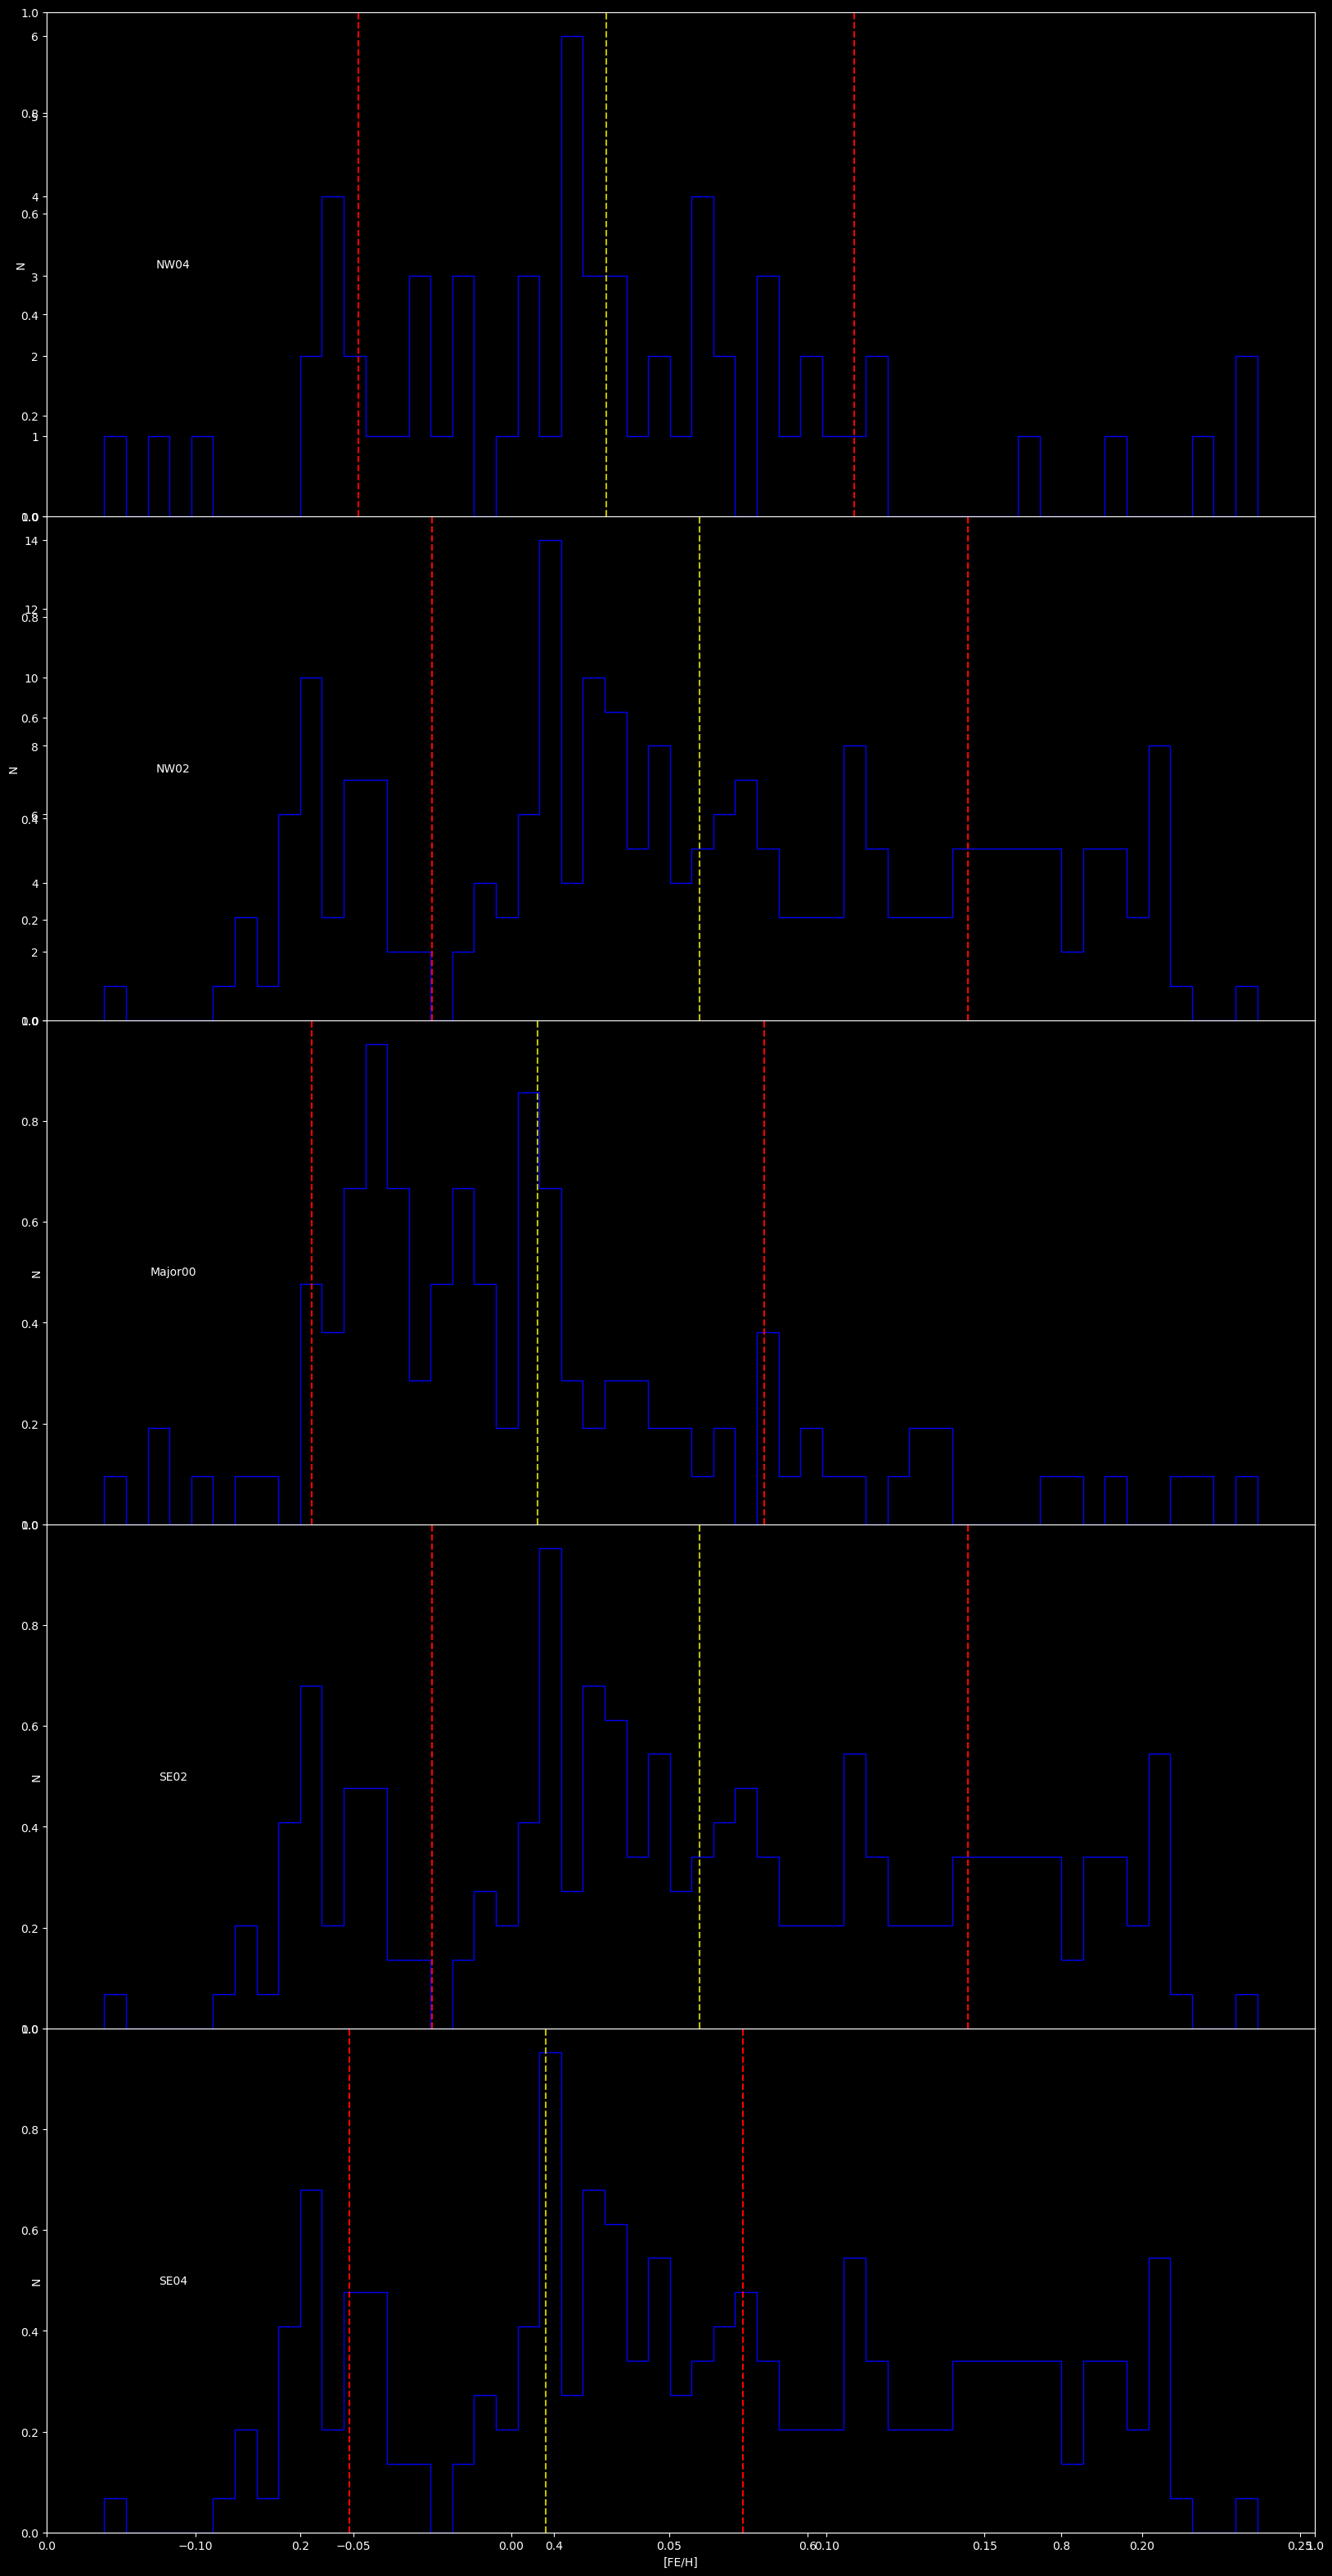

In [67]:
plt.style.use('dark_background')
fig, axes = plt.subplots(5, 1, figsize=(10,5), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax16 = fig.add_subplot(5,1,1)
ax16.hist(NW4,bins=53, histtype='step', color='b')
ax16.text(0.1, 0.5, 'NW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax16.transAxes)
ax16.set_ylabel('N')
ax16.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(NW4)

plt.axvline(NW_04_mean, c='y', linestyle='dashed')
plt.axvline(NW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_04_mean + sd, c='r', linestyle='dashed')
####################################################################################
ax14 = fig.add_subplot(5,1,2)
ax14.hist(NW2,bins=53, histtype='step', color='b')
ax14.text(0.1, 0.5, 'NW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes)
ax14.set_ylabel('N')
ax14.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(NW2)

plt.axvline(NW_02_mean, c='y', linestyle='dashed')
plt.axvline(NW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################

ax7 = fig.add_subplot(5,1,3)
ax7.hist(m00,bins=53, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')
ax7.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#######################################################################################
ax19 = fig.add_subplot(5,1,4)
ax19.hist(SE2,bins=53, histtype='step', color='b')
ax19.text(0.1, 0.5, 'SE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax19.transAxes)
ax19.set_ylabel('N')
ax19.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SE2)

plt.axvline(SE_02_mean, c='y', linestyle='dashed')
plt.axvline(SE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_02_mean + sd, c='r', linestyle='dashed')
###################################################################################################

ax20 = fig.add_subplot(5,1,5)
ax20.hist(SE2,bins=53, histtype='step', color='b')
ax20.text(0.1, 0.5, 'SE04', 
         horizontalalignment='center', verticalalignment='center', transform=ax20.transAxes)
ax20.set_ylabel('N')
ax20.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SE4)

plt.axvline(SE_04_mean, c='y', linestyle='dashed')
plt.axvline(SE_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_04_mean + sd, c='r', linestyle='dashed')
##################################################################################################

ax20.set_xlim(-1, 1) 
ax20.set_xticks([])


ax16.set_yticks([])
ax18.set_yticks([])
ax7.set_yticks([])
ax19.set_yticks([])
ax20.set_yticks([])

plt.show()


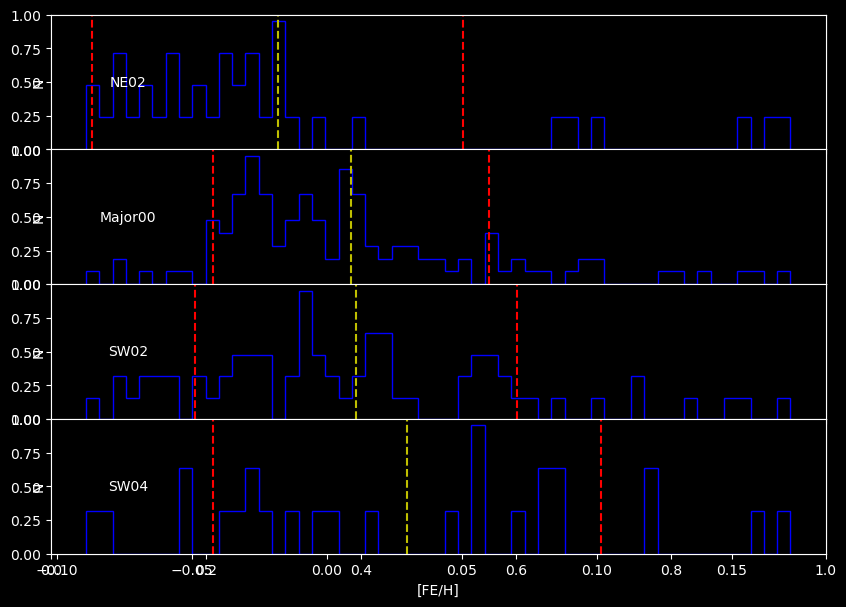

In [72]:
plt.style.use('dark_background')
fig, axes = plt.subplots(4, 1, figsize=(10,5), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax18 = fig.add_subplot(4,1,1)
ax18.hist(NE2,bins=53, histtype='step', color='b')
ax18.text(0.1, 0.5, 'NE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax18.transAxes)
ax18.set_ylabel('N')
ax18.set_xlabel('[FE/H]')
#standard deviatian and mean
sd = statistics.stdev(NE2)

plt.axvline(NE_02_mean, c='y', linestyle='dashed')
plt.axvline(NE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NE_02_mean + sd, c='r', linestyle='dashed')

###########################################################################
ax7 = fig.add_subplot(4,1,2)
ax7.hist(m00,bins=53, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')
ax7.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################
ax15 = fig.add_subplot(4,1,3)
ax15.hist(SW2,bins=53, histtype='step', color='b')
ax15.text(0.1, 0.5, 'SW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax15.transAxes)
ax15.set_ylabel('N')
ax15.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SW2)

plt.axvline(SW_02_mean, c='y', linestyle='dashed')
plt.axvline(SW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_02_mean + sd, c='r', linestyle='dashed')

#################################################################################################
ax17 = fig.add_subplot(4,1,4)
ax17.hist(SW4,bins=53, histtype='step', color='b')
ax17.text(0.1, 0.5, 'SW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes)
ax17.set_ylabel('N')
ax17.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SW4)

plt.axvline(SW_04_mean, c='y', linestyle='dashed')
plt.axvline(SW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_04_mean + sd, c='r', linestyle='dashed')
#################################################################################################


ax18.set_yticks([])
ax17.set_yticks([])
ax7.set_yticks([])
ax15.set_yticks([])

plt.show()

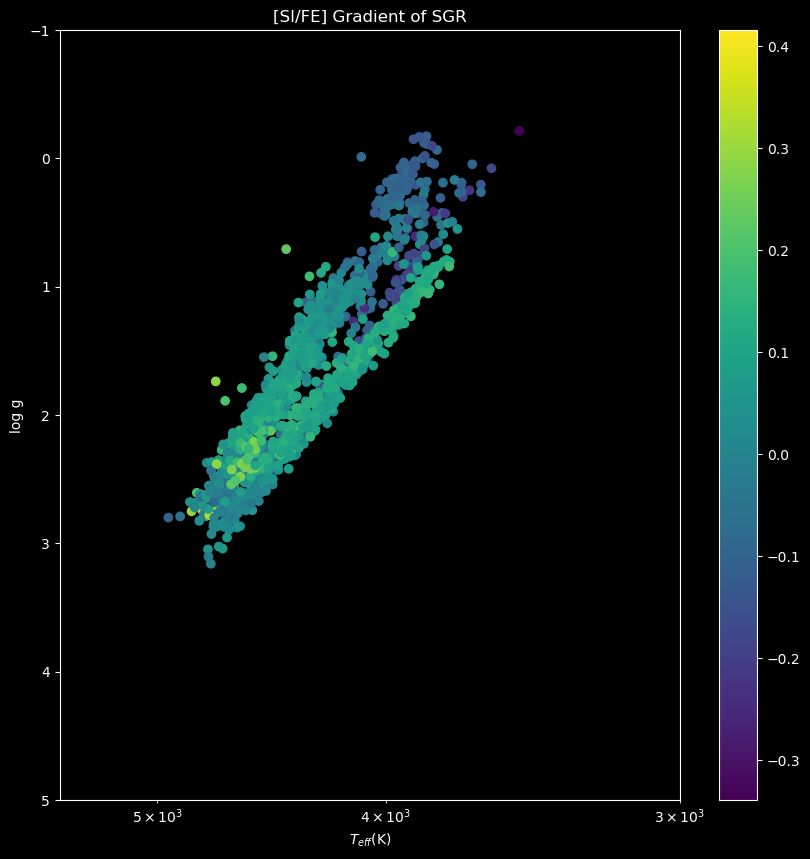

In [12]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(10,10))

x=plt.scatter(data['TEFF'], data['LOGG'], c= data['SI_FE'], cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[SI/FE] Gradient of SGR')
bar = fig.colorbar(x)

plt.xscale('log')
plt.xlim([5.5e3,3e3])
plt.ylim([5,-1])

plt.show()

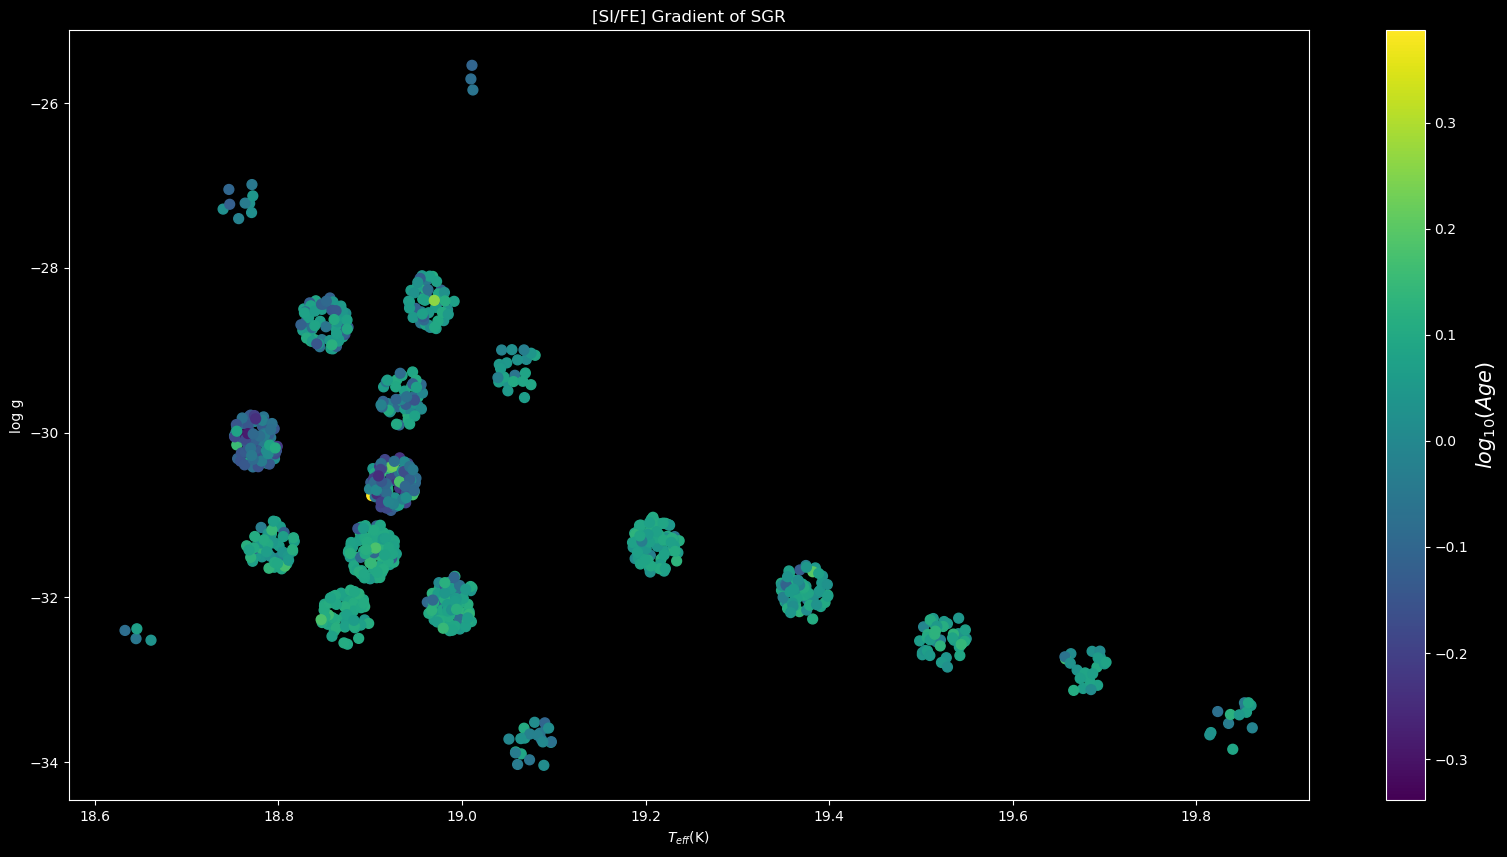

In [13]:
#plot SGR w/o irrelevant data atcorrespondong RA and DEC points 
plt.style.use('dark_background')
fig = plt.figure(figsize=(20,10))

x=plt.scatter(data['RAd'][cut], data['DEd'][cut], c= data['SI_FE'][cut], s=50, cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[SI/FE] Gradient of SGR')

bar = fig.colorbar(x)
bar.set_label('$log_{10} (Age)$', size=15)

plt.show()

In [14]:
major00 = (data['MAJOR'] == 0) & (data['MINOR'] == 0)
m00 = data['SI_FE'][major00]
major00_mean = np.mean(m00)

major02 = (data['MAJOR'] == 2) & (data['MINOR'] == 0)
m02 = data['SI_FE'][major02]
major02_mean = np.mean(m02)

major04 = (data['MAJOR'] == 4 ) & (data['MINOR'] == 0)
m04 = data['SI_FE'][major04]
major04_mean = np.mean(m04)

major06 = (data['MAJOR'] == 6) & (data['MINOR'] == 0)
m06 = data['SI_FE'][major06]
major06_mean = np.mean(m06)

major08 = (data['MAJOR'] == 8 ) & (data['MINOR'] == 0)
m08 = data['SI_FE'][major08]
major08_mean = np.mean(m08)

major10 = (data['MAJOR'] == 10 ) & (data['MINOR'] == 0)
m10 = data['SI_FE'][major10]
major10_mean = np.mean(m10)

major12 = (data['MAJOR'] == 12 ) & (data['MINOR'] == 0)
m12 = data['SI_FE'][major12]
major12_mean = np.mean(m12)

minor_01= (data['MAJOR'] == 0) & (data['MINOR'] == 1)
m_01 = data['SI_FE'][minor_01]
minor_01_mean = np.mean(m_01)

minor_02= (data['MAJOR'] == 0) & (data['MINOR'] == 2)
m_02 = data['SI_FE'][minor_02]
minor_02_mean = np.mean(m_02)

minor_05= (data['MAJOR'] == 0) & (data['MINOR'] == 5)
m_05 = data['SI_FE'][minor_05]
minor_05_mean = np.mean(m_05)

major_m_02 = (data['MAJOR'] == -2) & (data['MINOR'] == 0)
mm_02 = data['SI_FE'][major_m_02]
major_m_02_mean = np.mean(mm_02)

minor_m_01= (data['MAJOR'] == 0) & (data['MINOR'] == -1)
m_m01 = data['SI_FE'][minor_m_01]
minor_m_01_mean = np.mean(m_m01)

minor_m_02= (data['MAJOR'] == 0) & (data['MINOR'] == -2)
m_m02 = data['SI_FE'][minor_m_02]
minor_m_02_mean = np.mean(m_m02)

minor_m_03= (data['MAJOR'] == 0) & (data['MINOR'] == -3)
m_m03 = data['SI_FE'][minor_m_03]
minor_m_03_mean = np.mean(m_m03)

SW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == -2)
SW4 = data['SI_FE'][SW_04]
SW_04_mean = np.mean(SW4)

NW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == 2)
NW4 = data['SI_FE'][NW_04]
NW_04_mean = np.mean(NW4)

SE_04 = (data['MAJOR'] == 2) & (data['MINOR'] == -2)
SE4 = data['SI_FE'][SE_04]
SE_04_mean = np.mean(SE4)

NE_02 = (data['MAJOR'] == 1.4) & (data['MINOR'] == 1.4)
NE2 = data['SI_FE'][NE_02]
NE_02_mean = np.mean(NE2)

SW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == -1.4)
SW2 = data['SI_FE'][SW_02]
SW_02_mean = np.mean(SW2)

NW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
NW2 = data['SI_FE'][NW_02]
NW_02_mean = np.mean(NW2)

SE_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
SE2 = data['SI_FE'][SE_02]
SE_02_mean = np.mean(SE2)


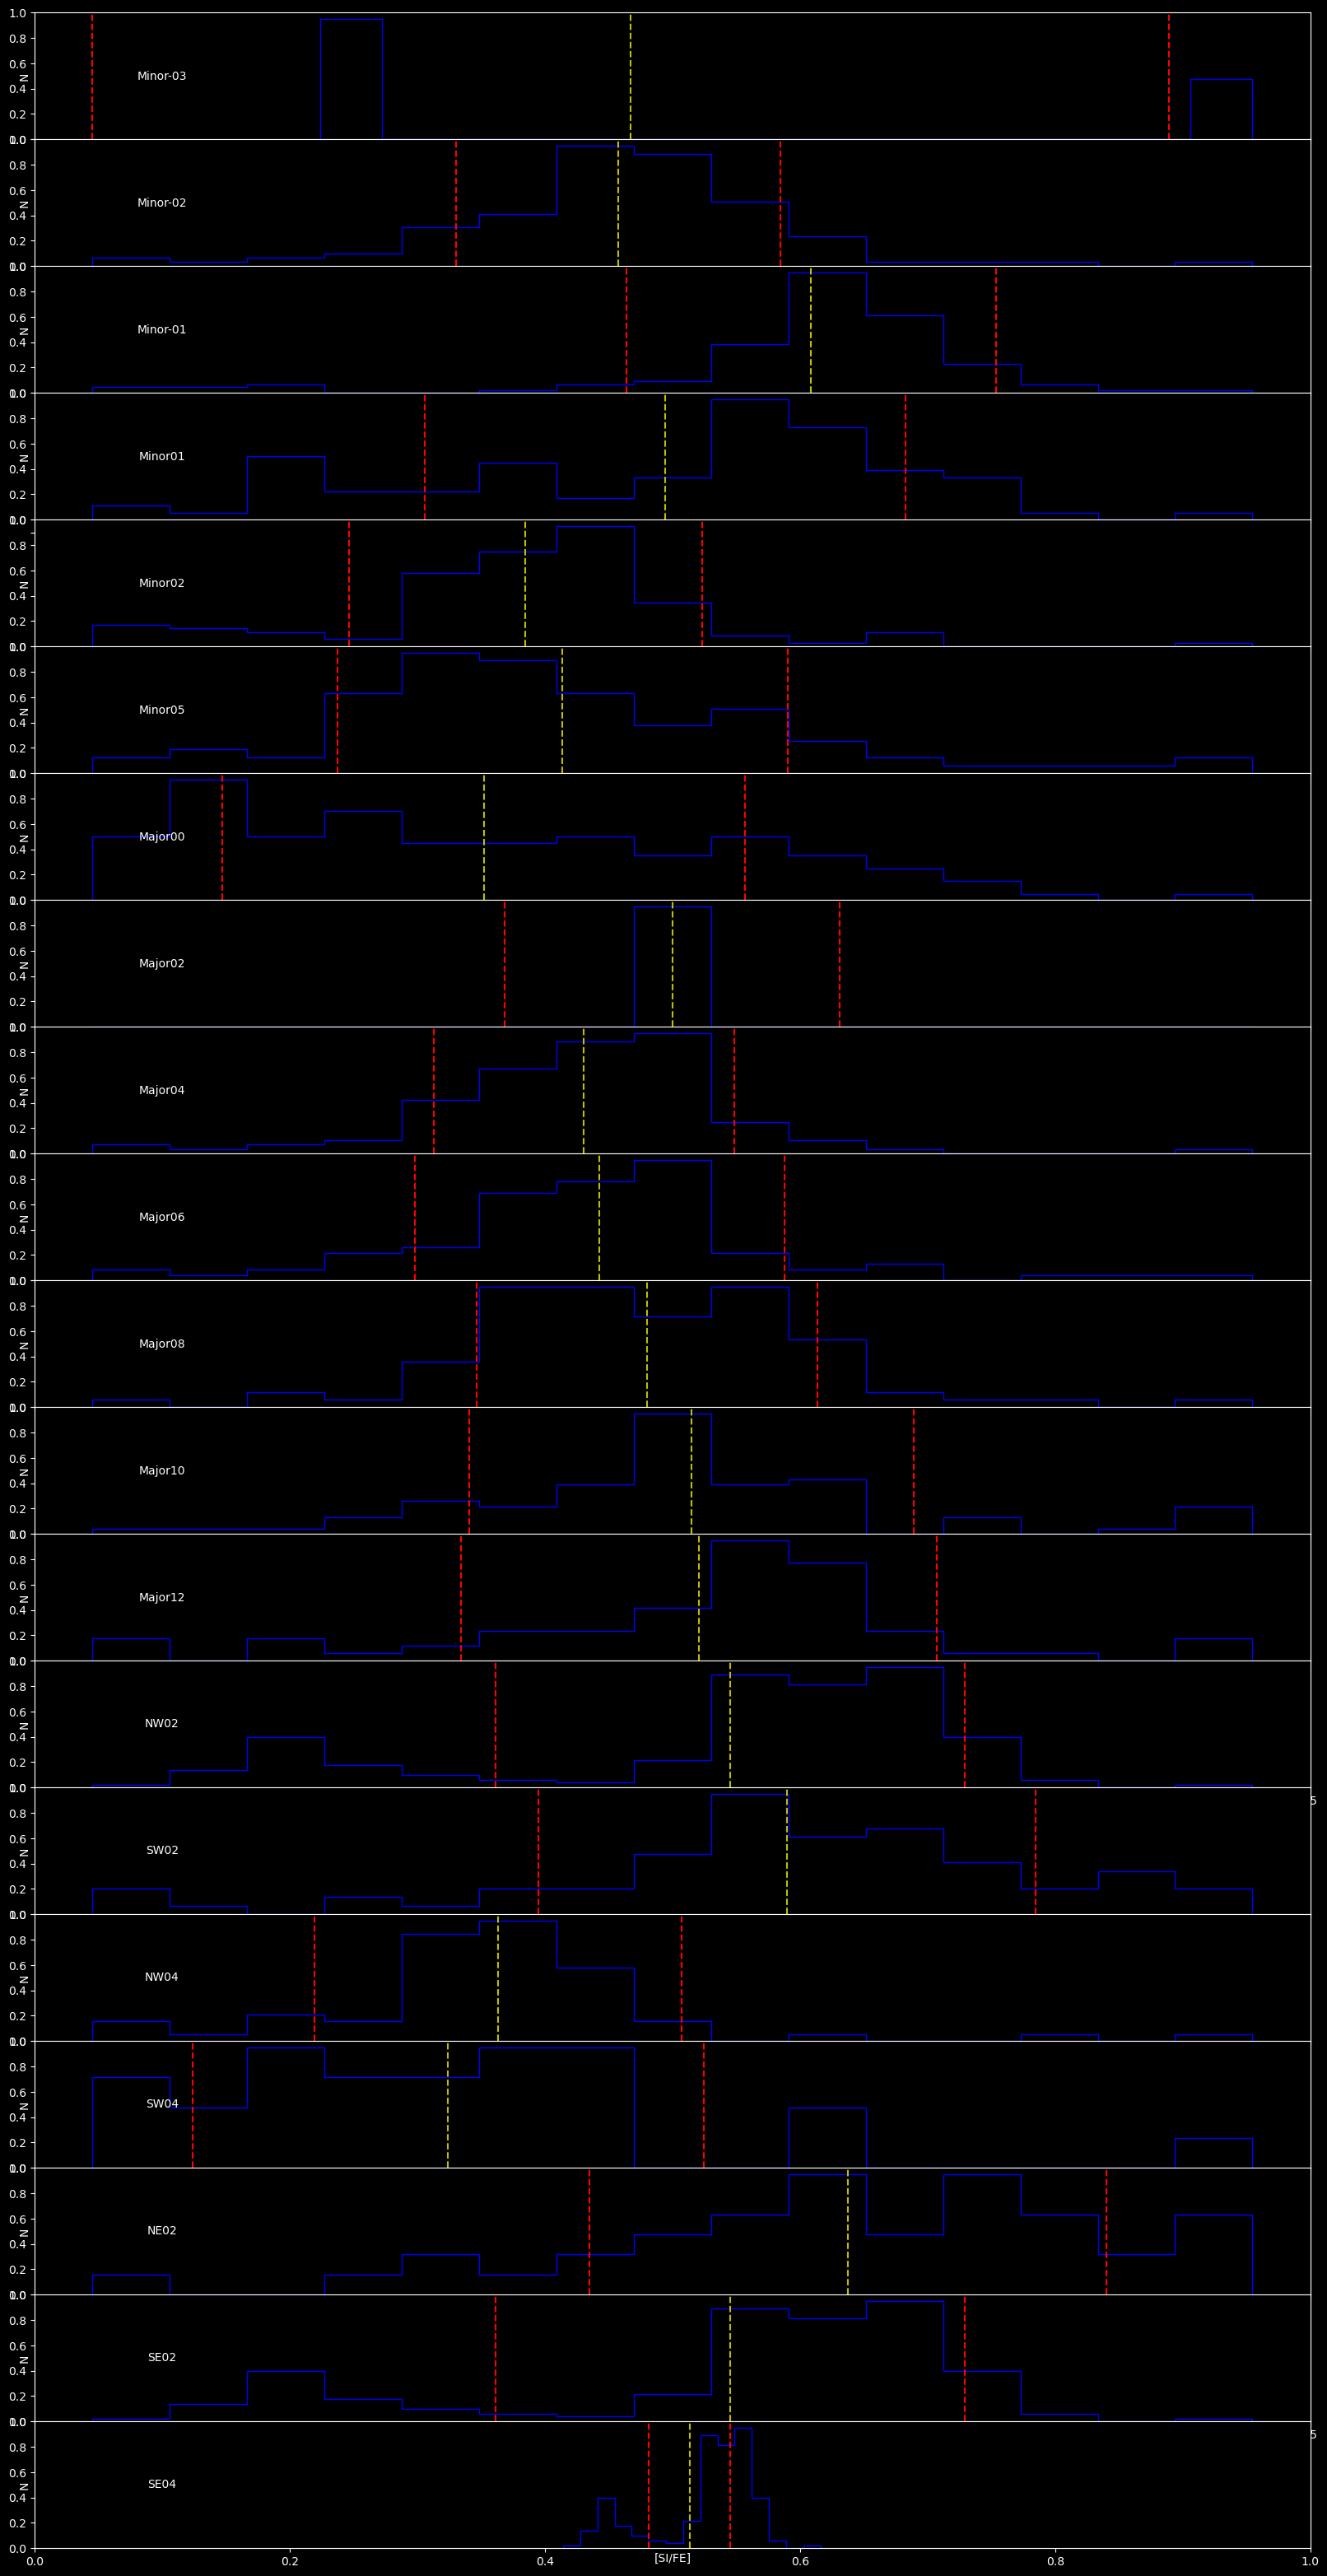

In [15]:
#number of historgrams to display
num_hist = 20

#plot the histograms
plt.style.use('dark_background')
fig, axes = plt.subplots(20, 1, figsize=(20,40), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
###################################################################################
ax1 = fig.add_subplot(20,1,1)
ax1.hist(m_m03,bins=15, histtype='step', color='b')
ax1.text(0.1, 0.5, 'Minor-03', 
         horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax1.set_ylabel('N')
ax1.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m_m03)

plt.axvline(minor_m_03_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_03_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_03_mean + sd, c='r', linestyle='dashed')
###################################################################################
ax2 = fig.add_subplot(20,1,2)
ax2.hist(m_m02,bins=15, histtype='step', color='b')
ax2.text(0.1, 0.5, 'Minor-02', 
         horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax2.set_ylabel('N')
ax2.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m_m02)

plt.axvline(minor_m_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_02_mean + sd, c='r', linestyle='dashed')

#############################################################################################
#plot the histograms

ax3 = fig.add_subplot(20,1,3)
ax3.hist(m_m01,bins=15, histtype='step', color='b')
ax3.text(0.1, 0.5, 'Minor-01', 
         horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
ax3.set_ylabel('N')
ax3.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m_m01)

plt.axvline(minor_m_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_01_mean + sd, c='r', linestyle='dashed')
#####################################################################################################
#plot the histograms

ax4 = fig.add_subplot(20,1,4)
ax4.hist(m_01,bins=15, histtype='step', color='b')
ax4.text(0.1, 0.5, 'Minor01', 
         horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
ax4.set_ylabel('N')
ax4.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_01_mean + sd, c='r', linestyle='dashed')
#######################################################################################
#plot the histograms

ax5 = fig.add_subplot(20,1,5)
ax5.hist(m_02,bins=15, histtype='step', color='b')
ax5.text(0.1, 0.5, 'Minor02', 
         horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
ax5.set_ylabel('N')
ax5.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m_02)

plt.axvline(minor_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_02_mean + sd, c='r', linestyle='dashed')
#####################################################################################################

ax6 = fig.add_subplot(20,1,6)
ax6.hist(m_05,bins=15, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Minor05', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.set_ylabel('N')
ax6.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m_05)

plt.axvline(minor_05_mean, c='y', linestyle='dashed')
plt.axvline(minor_05_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_05_mean + sd, c='r', linestyle='dashed')

#####################################################################################################
ax7 = fig.add_subplot(20,1,7)
ax7.hist(m00,bins=15, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')
ax7.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################################################################
ax8 = fig.add_subplot(20,1,8)
ax8.hist(m02,bins=15, histtype='step', color='b')
ax8.text(0.1, 0.5, 'Major02', 
         horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes)
ax8.set_ylabel('N')
ax8.set_xlabel('[SI/FE]')

#standard deviatian and mean
#sd = statistics.stdev(m02)

plt.axvline(major02_mean, c='y', linestyle='dashed')
plt.axvline(major02_mean - sd, c='r', linestyle='dashed')
plt.axvline(major02_mean+ sd, c='r', linestyle='dashed')
#####################################################################################################
ax9 = fig.add_subplot(20,1,9)
ax9.hist(m04,bins=15, histtype='step', color='b')
ax9.text(0.1, 0.5, 'Major04', 
         horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)
ax9.set_ylabel('N')
ax9.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m04)

plt.axvline(major04_mean, c='y', linestyle='dashed')
plt.axvline(major04_mean - sd, c='r', linestyle='dashed')
plt.axvline(major04_mean+ sd, c='r', linestyle='dashed')
###################################################################################
ax10 = fig.add_subplot(20,1,10)
ax10.hist(m06,bins=15, histtype='step', color='b')
ax10.text(0.1, 0.5, 'Major06', 
         horizontalalignment='center', verticalalignment='center', transform=ax10.transAxes)
ax10.set_ylabel('N')
ax10.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m06)

plt.axvline(major06_mean, c='y', linestyle='dashed')
plt.axvline(major06_mean - sd, c='r', linestyle='dashed')
plt.axvline(major06_mean+ sd, c='r', linestyle='dashed')

###############################################################################################
ax11 = fig.add_subplot(20,1,11)
ax11.hist(m08,bins=15, histtype='step', color='b')
ax11.text(0.1, 0.5, 'Major08', 
         horizontalalignment='center', verticalalignment='center', transform=ax11.transAxes)
ax11.set_ylabel('N')
ax11.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m08)

plt.axvline(major08_mean, c='y', linestyle='dashed')
plt.axvline(major08_mean - sd, c='r', linestyle='dashed')
plt.axvline(major08_mean+ sd, c='r', linestyle='dashed')
###################################################################################################
ax12 = fig.add_subplot(20,1,12)
ax12.hist(m10,bins=15, histtype='step', color='b')
ax12.text(0.1, 0.5, 'Major10', 
         horizontalalignment='center', verticalalignment='center', transform=ax12.transAxes)
ax12.set_ylabel('N')
ax12.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m10)

plt.axvline(major10_mean, c='y', linestyle='dashed')
plt.axvline(major10_mean - sd, c='r', linestyle='dashed')
plt.axvline(major10_mean+ sd, c='r', linestyle='dashed')

######################################################################################################
ax13 = fig.add_subplot(20,1,13)
ax13.hist(m12,bins=15, histtype='step', color='b')
ax13.text(0.1, 0.5, 'Major12', 
         horizontalalignment='center', verticalalignment='center', transform=ax13.transAxes)
ax13.set_ylabel('N')
ax13.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(m12)

plt.axvline(major12_mean, c='y', linestyle='dashed')
plt.axvline(major12_mean - sd, c='r', linestyle='dashed')
plt.axvline(major12_mean+ sd, c='r', linestyle='dashed')
######################################################################################################
ax14 = fig.add_subplot(20,1,14)
ax14.hist(NW2,bins=15, histtype='step', color='b')
ax14.text(0.1, 0.5, 'NW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes)
ax14.set_ylabel('N')
ax14.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(NW2)

plt.axvline(NW_02_mean, c='y', linestyle='dashed')
plt.axvline(NW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax15 = fig.add_subplot(20,1,15)
ax15.hist(SW2,bins=15, histtype='step', color='b')
ax15.text(0.1, 0.5, 'SW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax15.transAxes)
ax15.set_ylabel('N')
ax15.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(SW2)

plt.axvline(SW_02_mean, c='y', linestyle='dashed')
plt.axvline(SW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax16 = fig.add_subplot(20,1,16)
ax16.hist(NW4,bins=15, histtype='step', color='b')
ax16.text(0.1, 0.5, 'NW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax16.transAxes)
ax16.set_ylabel('N')
ax16.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(NW4)

plt.axvline(NW_04_mean, c='y', linestyle='dashed')
plt.axvline(NW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_04_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax17 = fig.add_subplot(20,1,17)
ax17.hist(SW4,bins=15, histtype='step', color='b')
ax17.text(0.1, 0.5, 'SW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes)
ax17.set_ylabel('N')
ax17.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(SW4)

plt.axvline(SW_04_mean, c='y', linestyle='dashed')
plt.axvline(SW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_04_mean + sd, c='r', linestyle='dashed')
######################################################################################################
ax18 = fig.add_subplot(20,1,18)
ax18.hist(NE2,bins=15, histtype='step', color='b')
ax18.text(0.1, 0.5, 'NE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax18.transAxes)
ax18.set_ylabel('N')
ax18.set_xlabel('[SI/FE]')
#standard deviatian and mean
sd = statistics.stdev(NE2)

plt.axvline(NE_02_mean, c='y', linestyle='dashed')
plt.axvline(NE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NE_02_mean + sd, c='r', linestyle='dashed')
#######################################################################################################
ax19 = fig.add_subplot(20,1,19)
ax19.hist(SE2,bins=15, histtype='step', color='b')
ax19.text(0.1, 0.5, 'SE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax19.transAxes)
ax19.set_ylabel('N')
ax19.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(SE2)

plt.axvline(SE_02_mean, c='y', linestyle='dashed')
plt.axvline(SE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_02_mean + sd, c='r', linestyle='dashed')
###################################################################################################

ax20 = fig.add_subplot(20,1,20)
ax20.hist(SE2,bins=15, histtype='step', color='b')
ax20.text(0.1, 0.5, 'SE04', 
         horizontalalignment='center', verticalalignment='center', transform=ax20.transAxes)
ax20.set_ylabel('N')
ax20.set_xlabel('[SI/FE]')

#standard deviatian and mean
sd = statistics.stdev(SE4)

plt.axvline(SE_04_mean, c='y', linestyle='dashed')
plt.axvline(SE_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_04_mean + sd, c='r', linestyle='dashed')

ax20.set_xlim(-1, 1) 
ax20.set_xticks([])

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])
ax7.set_yticks([])
ax8.set_yticks([])
ax9.set_yticks([])
ax10.set_yticks([])
ax11.set_yticks([])
ax12.set_yticks([])
ax13.set_yticks([])
ax14.set_yticks([])
ax15.set_yticks([])
ax16.set_yticks([])
ax17.set_yticks([])
ax18.set_yticks([])
ax19.set_yticks([])
ax20.set_yticks([])



plt.show()

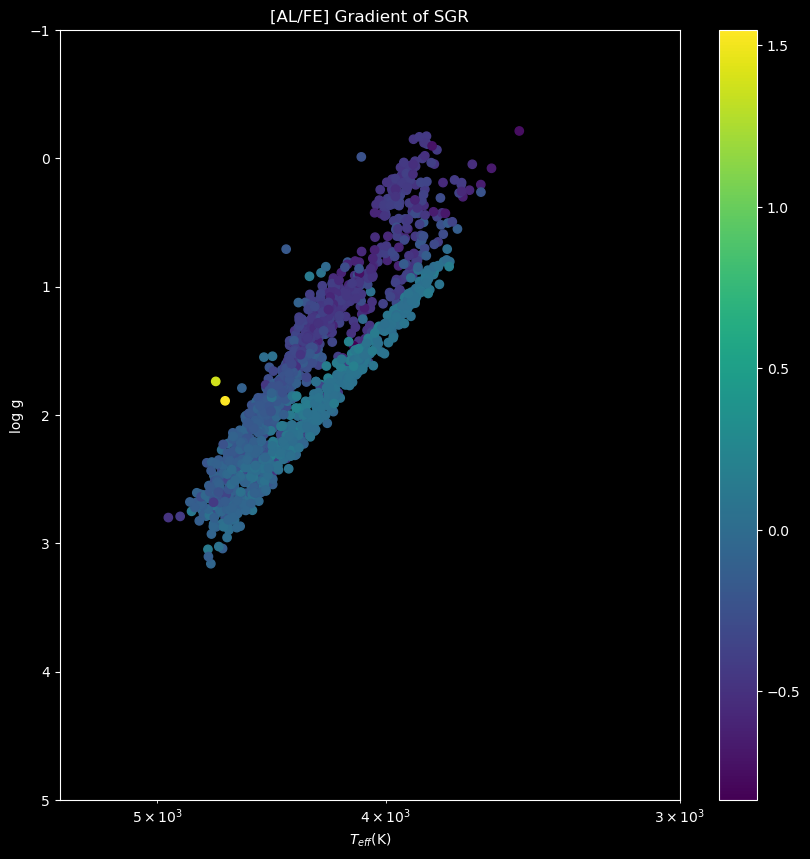

In [16]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(10,10))

x=plt.scatter(data['TEFF'], data['LOGG'], c= data['AL_FE'], cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[AL/FE] Gradient of SGR')
bar = fig.colorbar(x)

plt.xscale('log')
plt.xlim([5.5e3,3e3])
plt.ylim([5,-1])

plt.show()

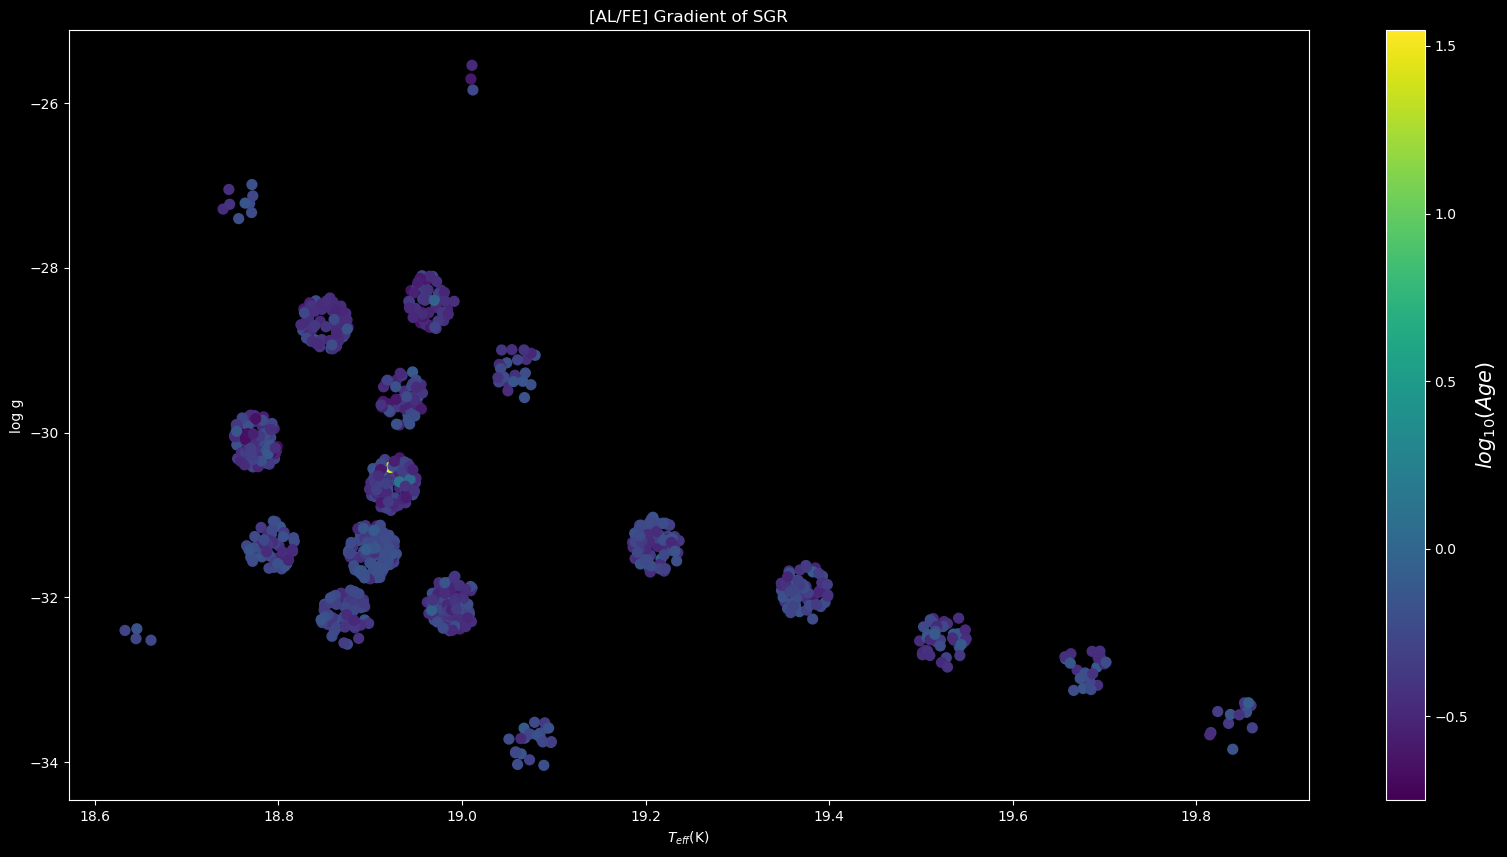

In [17]:
#plot SGR w/o irrelevant data atcorrespondong RA and DEC points 
plt.style.use('dark_background')
fig = plt.figure(figsize=(20,10))

x=plt.scatter(data['RAd'][cut], data['DEd'][cut], c= data['AL_FE'][cut], s=50, cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[AL/FE] Gradient of SGR')

bar = fig.colorbar(x)
bar.set_label('$log_{10} (Age)$', size=15)

plt.show()

In [18]:
major00 = (data['MAJOR'] == 0) & (data['MINOR'] == 0)
m00 = data['AL_FE'][major00]
major00_mean = np.mean(m00)

major02 = (data['MAJOR'] == 2) & (data['MINOR'] == 0)
m02 = data['AL_FE'][major02]
major02_mean = np.mean(m02)

major04 = (data['MAJOR'] == 4 ) & (data['MINOR'] == 0)
m04 = data['AL_FE'][major04]
major04_mean = np.mean(m04)

major06 = (data['MAJOR'] == 6) & (data['MINOR'] == 0)
m06 = data['AL_FE'][major06]
major06_mean = np.mean(m06)

major08 = (data['MAJOR'] == 8 ) & (data['MINOR'] == 0)
m08 = data['AL_FE'][major08]
major08_mean = np.mean(m08)

major10 = (data['MAJOR'] == 10 ) & (data['MINOR'] == 0)
m10 = data['AL_FE'][major10]
major10_mean = np.mean(m10)

major12 = (data['MAJOR'] == 12 ) & (data['MINOR'] == 0)
m12 = data['AL_FE'][major12]
major12_mean = np.mean(m12)

minor_01= (data['MAJOR'] == 0) & (data['MINOR'] == 1)
m_01 = data['AL_FE'][minor_01]
minor_01_mean = np.mean(m_01)

minor_02= (data['MAJOR'] == 0) & (data['MINOR'] == 2)
m_02 = data['AL_FE'][minor_02]
minor_02_mean = np.mean(m_02)

minor_05= (data['MAJOR'] == 0) & (data['MINOR'] == 5)
m_05 = data['AL_FE'][minor_05]
minor_05_mean = np.mean(m_05)

major_m_02 = (data['MAJOR'] == -2) & (data['MINOR'] == 0)
mm_02 = data['AL_FE'][major_m_02]
major_m_02_mean = np.mean(mm_02)

minor_m_01= (data['MAJOR'] == 0) & (data['MINOR'] == -1)
m_m01 = data['AL_FE'][minor_m_01]
minor_m_01_mean = np.mean(m_m01)

minor_m_02= (data['MAJOR'] == 0) & (data['MINOR'] == -2)
m_m02 = data['AL_FE'][minor_m_02]
minor_m_02_mean = np.mean(m_m02)

minor_m_03= (data['MAJOR'] == 0) & (data['MINOR'] == -3)
m_m03 = data['AL_FE'][minor_m_03]
minor_m_03_mean = np.mean(m_m03)

SW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == -2)
SW4 = data['AL_FE'][SW_04]
SW_04_mean = np.mean(SW4)

NW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == 2)
NW4 = data['AL_FE'][NW_04]
NW_04_mean = np.mean(NW4)

SE_04 = (data['MAJOR'] == 2) & (data['MINOR'] == -2)
SE4 = data['AL_FE'][SE_04]
SE_04_mean = np.mean(SE4)

NE_02 = (data['MAJOR'] == 1.4) & (data['MINOR'] == 1.4)
NE2 = data['AL_FE'][NE_02]
NE_02_mean = np.mean(NE2)

SW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == -1.4)
SW2 = data['AL_FE'][SW_02]
SW_02_mean = np.mean(SW2)

NW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
NW2 = data['AL_FE'][NW_02]
NW_02_mean = np.mean(NW2)

SE_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
SE2 = data['AL_FE'][SE_02]
SE_02_mean = np.mean(SE2)


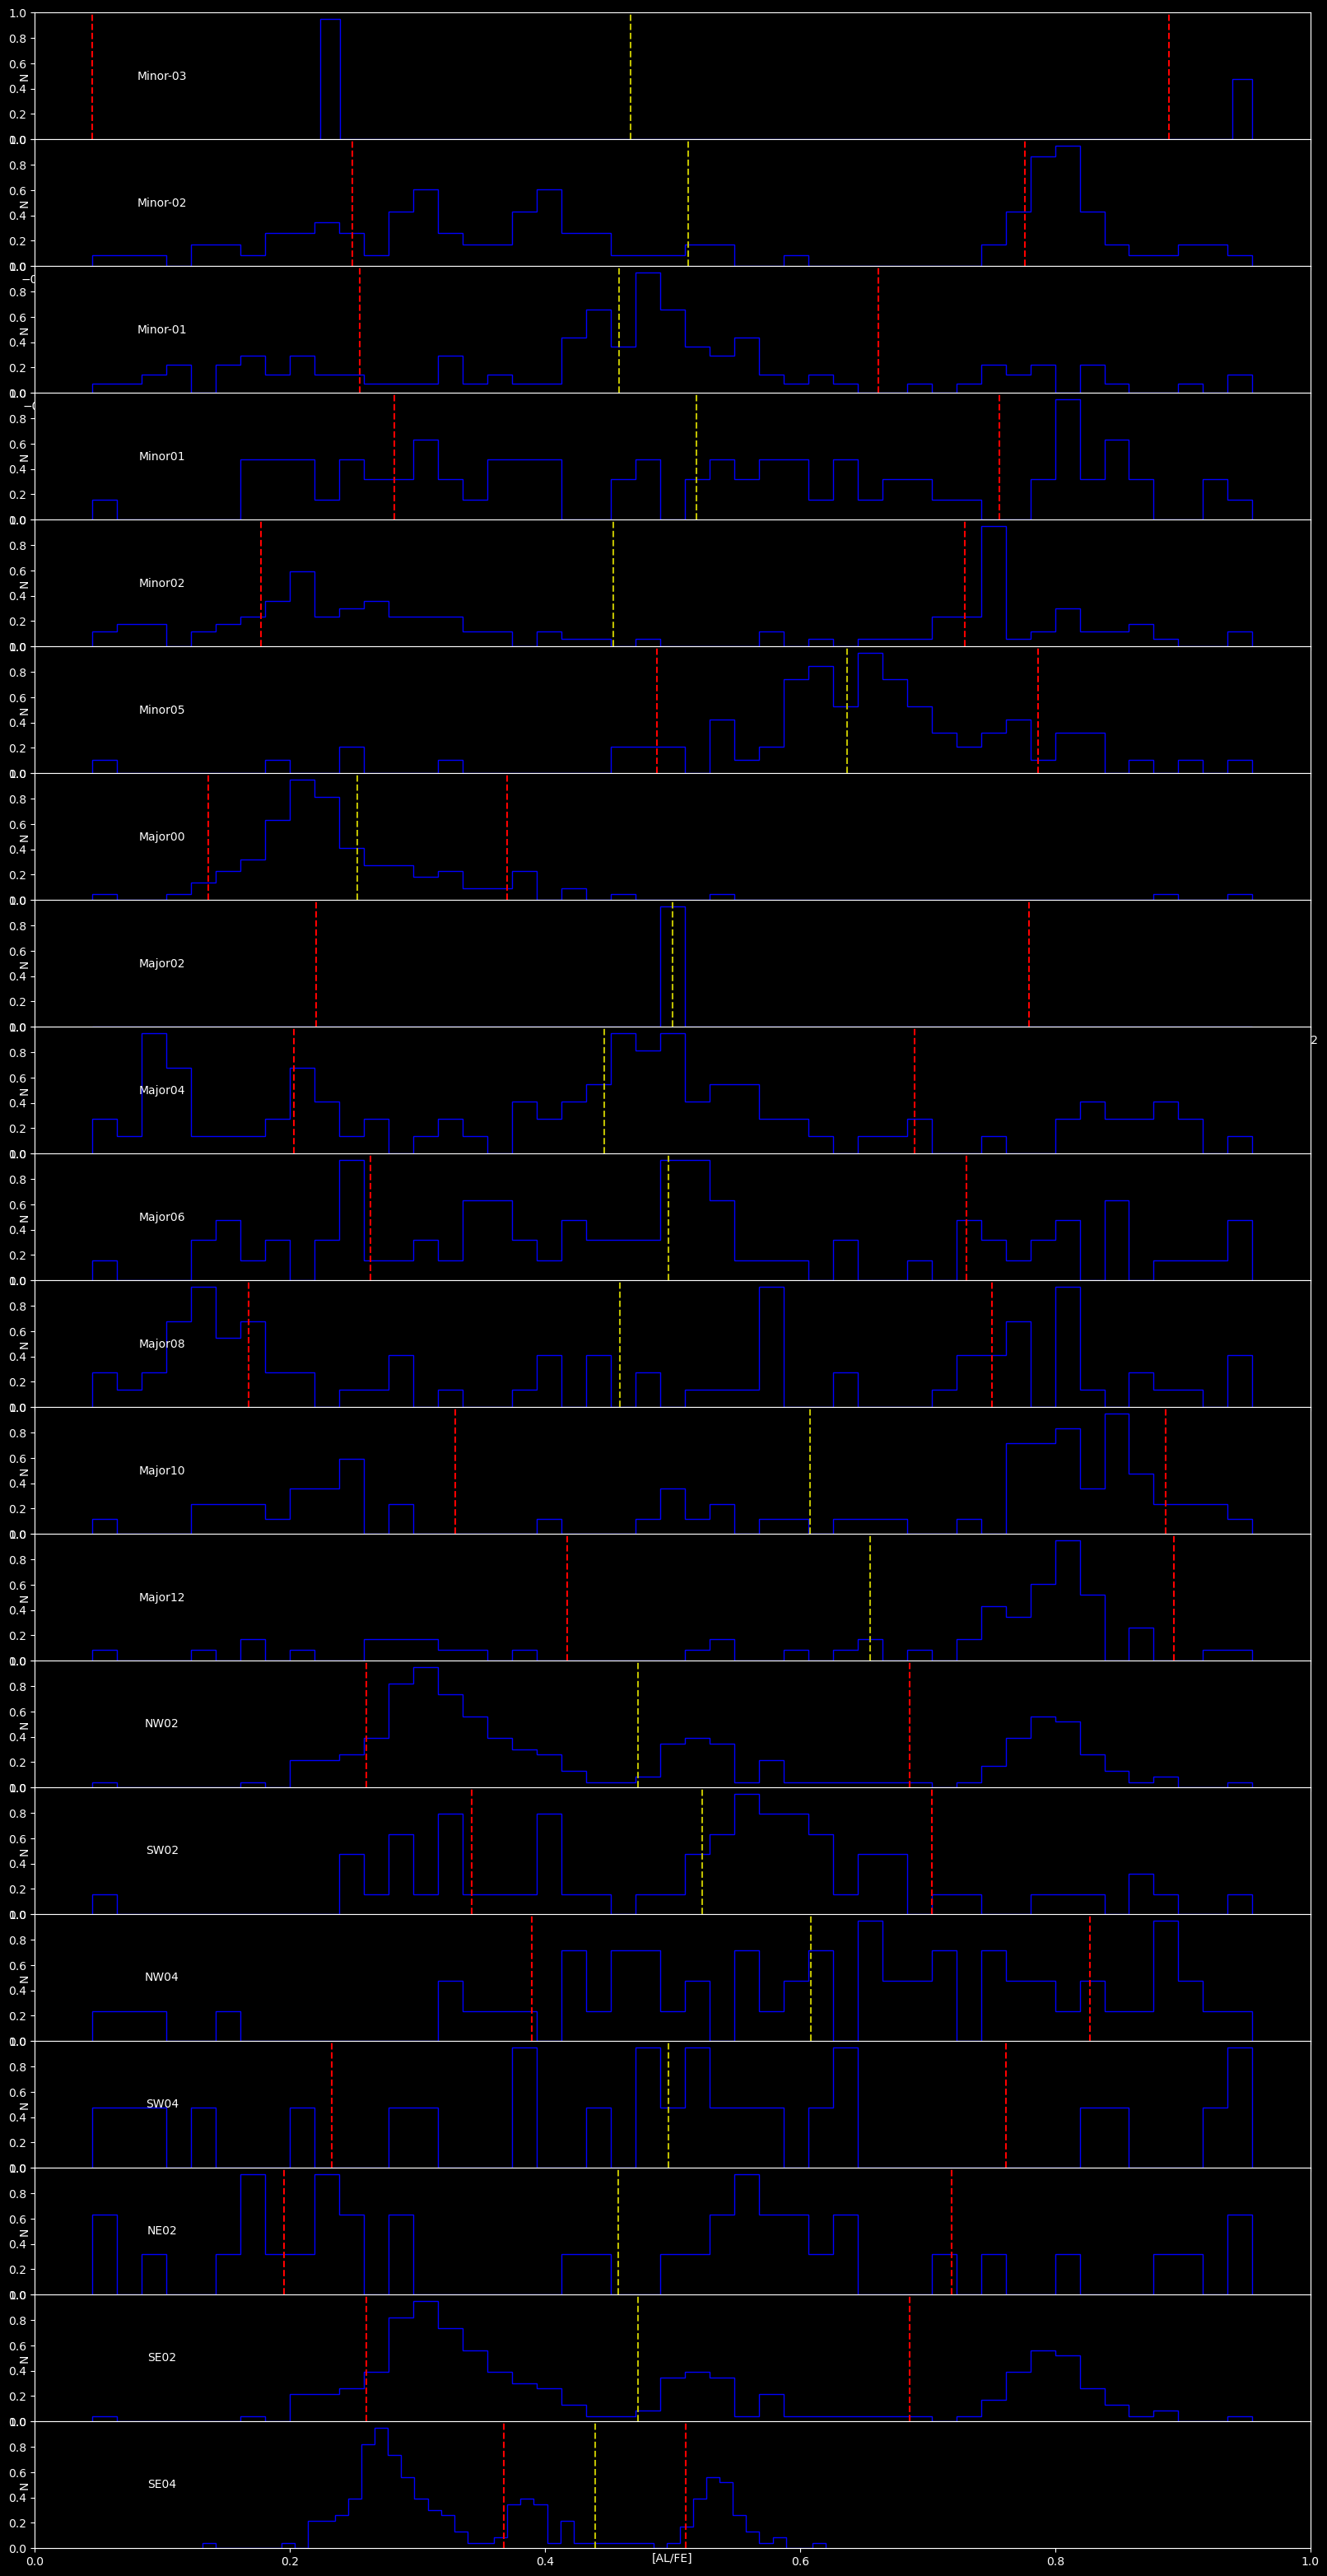

In [19]:
#number of historgrams to display
num_hist = 20

#plot the histograms
plt.style.use('dark_background')
fig, axes = plt.subplots(20, 1, figsize=(20,40), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
###################################################################################
ax1 = fig.add_subplot(20,1,1)
ax1.hist(m_m03,bins=47, histtype='step', color='b')
ax1.text(0.1, 0.5, 'Minor-03', 
         horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax1.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m03)

plt.axvline(minor_m_03_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_03_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_03_mean + sd, c='r', linestyle='dashed')
###################################################################################
ax2 = fig.add_subplot(20,1,2)
ax2.hist(m_m02,bins=47, histtype='step', color='b')
ax2.text(0.1, 0.5, 'Minor-02', 
         horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax2.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m02)

plt.axvline(minor_m_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_02_mean + sd, c='r', linestyle='dashed')

#############################################################################################
#plot the histograms

ax3 = fig.add_subplot(20,1,3)
ax3.hist(m_m01,bins=47, histtype='step', color='b')
ax3.text(0.1, 0.5, 'Minor-01', 
         horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
ax3.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m01)

plt.axvline(minor_m_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_01_mean + sd, c='r', linestyle='dashed')
#####################################################################################################
#plot the histograms

ax4 = fig.add_subplot(20,1,4)
ax4.hist(m_01,bins=47, histtype='step', color='b')
ax4.text(0.1, 0.5, 'Minor01', 
         horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
ax4.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_01_mean + sd, c='r', linestyle='dashed')
#######################################################################################
#plot the histograms

ax5 = fig.add_subplot(20,1,5)
ax5.hist(m_02,bins=47, histtype='step', color='b')
ax5.text(0.1, 0.5, 'Minor02', 
         horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
ax5.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_02)

plt.axvline(minor_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_02_mean + sd, c='r', linestyle='dashed')
#####################################################################################################

ax6 = fig.add_subplot(20,1,6)
ax6.hist(m_05,bins=47, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Minor05', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m_05)

plt.axvline(minor_05_mean, c='y', linestyle='dashed')
plt.axvline(minor_05_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_05_mean + sd, c='r', linestyle='dashed')

#####################################################################################################
ax7 = fig.add_subplot(20,1,7)
ax7.hist(m00,bins=47, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################################################################
ax8 = fig.add_subplot(20,1,8)
ax8.hist(m02,bins=47, histtype='step', color='b')
ax8.text(0.1, 0.5, 'Major02', 
         horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes)
ax8.set_ylabel('N')

#standard deviatian and mean
#sd = statistics.stdev(m02)

plt.axvline(major02_mean, c='y', linestyle='dashed')
plt.axvline(major02_mean - sd, c='r', linestyle='dashed')
plt.axvline(major02_mean+ sd, c='r', linestyle='dashed')
#####################################################################################################
ax9 = fig.add_subplot(20,1,9)
ax9.hist(m04,bins=47, histtype='step', color='b')
ax9.text(0.1, 0.5, 'Major04', 
         horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)
ax9.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m04)

plt.axvline(major04_mean, c='y', linestyle='dashed')
plt.axvline(major04_mean - sd, c='r', linestyle='dashed')
plt.axvline(major04_mean+ sd, c='r', linestyle='dashed')
###################################################################################
ax10 = fig.add_subplot(20,1,10)
ax10.hist(m06,bins=47, histtype='step', color='b')
ax10.text(0.1, 0.5, 'Major06', 
         horizontalalignment='center', verticalalignment='center', transform=ax10.transAxes)
ax10.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m06)

plt.axvline(major06_mean, c='y', linestyle='dashed')
plt.axvline(major06_mean - sd, c='r', linestyle='dashed')
plt.axvline(major06_mean+ sd, c='r', linestyle='dashed')

###############################################################################################
ax11 = fig.add_subplot(20,1,11)
ax11.hist(m08,bins=47, histtype='step', color='b')
ax11.text(0.1, 0.5, 'Major08', 
         horizontalalignment='center', verticalalignment='center', transform=ax11.transAxes)
ax11.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m08)

plt.axvline(major08_mean, c='y', linestyle='dashed')
plt.axvline(major08_mean - sd, c='r', linestyle='dashed')
plt.axvline(major08_mean+ sd, c='r', linestyle='dashed')
###################################################################################################
ax12 = fig.add_subplot(20,1,12)
ax12.hist(m10,bins=47, histtype='step', color='b')
ax12.text(0.1, 0.5, 'Major10', 
         horizontalalignment='center', verticalalignment='center', transform=ax12.transAxes)
ax12.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m10)

plt.axvline(major10_mean, c='y', linestyle='dashed')
plt.axvline(major10_mean - sd, c='r', linestyle='dashed')
plt.axvline(major10_mean+ sd, c='r', linestyle='dashed')

######################################################################################################
ax13 = fig.add_subplot(20,1,13)
ax13.hist(m12,bins=47, histtype='step', color='b')
ax13.text(0.1, 0.5, 'Major12', 
         horizontalalignment='center', verticalalignment='center', transform=ax13.transAxes)
ax13.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m12)

plt.axvline(major12_mean, c='y', linestyle='dashed')
plt.axvline(major12_mean - sd, c='r', linestyle='dashed')
plt.axvline(major12_mean+ sd, c='r', linestyle='dashed')
######################################################################################################
ax14 = fig.add_subplot(20,1,14)
ax14.hist(NW2,bins=47, histtype='step', color='b')
ax14.text(0.1, 0.5, 'NW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes)
ax14.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NW2)

plt.axvline(NW_02_mean, c='y', linestyle='dashed')
plt.axvline(NW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax15 = fig.add_subplot(20,1,15)
ax15.hist(SW2,bins=47, histtype='step', color='b')
ax15.text(0.1, 0.5, 'SW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax15.transAxes)
ax15.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SW2)

plt.axvline(SW_02_mean, c='y', linestyle='dashed')
plt.axvline(SW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax16 = fig.add_subplot(20,1,16)
ax16.hist(NW4,bins=47, histtype='step', color='b')
ax16.text(0.1, 0.5, 'NW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax16.transAxes)
ax16.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NW4)

plt.axvline(NW_04_mean, c='y', linestyle='dashed')
plt.axvline(NW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_04_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax17 = fig.add_subplot(20,1,17)
ax17.hist(SW4,bins=47, histtype='step', color='b')
ax17.text(0.1, 0.5, 'SW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes)
ax17.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SW4)

plt.axvline(SW_04_mean, c='y', linestyle='dashed')
plt.axvline(SW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_04_mean + sd, c='r', linestyle='dashed')
######################################################################################################
ax18 = fig.add_subplot(20,1,18)
ax18.hist(NE2,bins=47, histtype='step', color='b')
ax18.text(0.1, 0.5, 'NE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax18.transAxes)
ax18.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NE2)

plt.axvline(NE_02_mean, c='y', linestyle='dashed')
plt.axvline(NE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NE_02_mean + sd, c='r', linestyle='dashed')
#######################################################################################################
ax19 = fig.add_subplot(20,1,19)
ax19.hist(SE2,bins=47, histtype='step', color='b')
ax19.text(0.1, 0.5, 'SE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax19.transAxes)
ax19.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SE2)

plt.axvline(SE_02_mean, c='y', linestyle='dashed')
plt.axvline(SE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_02_mean + sd, c='r', linestyle='dashed')
###################################################################################################

ax20 = fig.add_subplot(20,1,20)
ax20.hist(SE2,bins=47, histtype='step', color='b')
ax20.text(0.1, 0.5, 'SE04', 
         horizontalalignment='center', verticalalignment='center', transform=ax20.transAxes)
ax20.set_ylabel('N')
ax20.set_xlabel('[AL/FE]')

#standard deviatian and mean
sd = statistics.stdev(SE4)

plt.axvline(SE_04_mean, c='y', linestyle='dashed')
plt.axvline(SE_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_04_mean + sd, c='r', linestyle='dashed')

ax20.set_xlim(-1, 1) 
ax20.set_xticks([])

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])
ax7.set_yticks([])
ax8.set_yticks([])
ax9.set_yticks([])
ax10.set_yticks([])
ax11.set_yticks([])
ax12.set_yticks([])
ax13.set_yticks([])
ax14.set_yticks([])
ax15.set_yticks([])
ax16.set_yticks([])
ax17.set_yticks([])
ax18.set_yticks([])
ax19.set_yticks([])
ax20.set_yticks([])


plt.show()

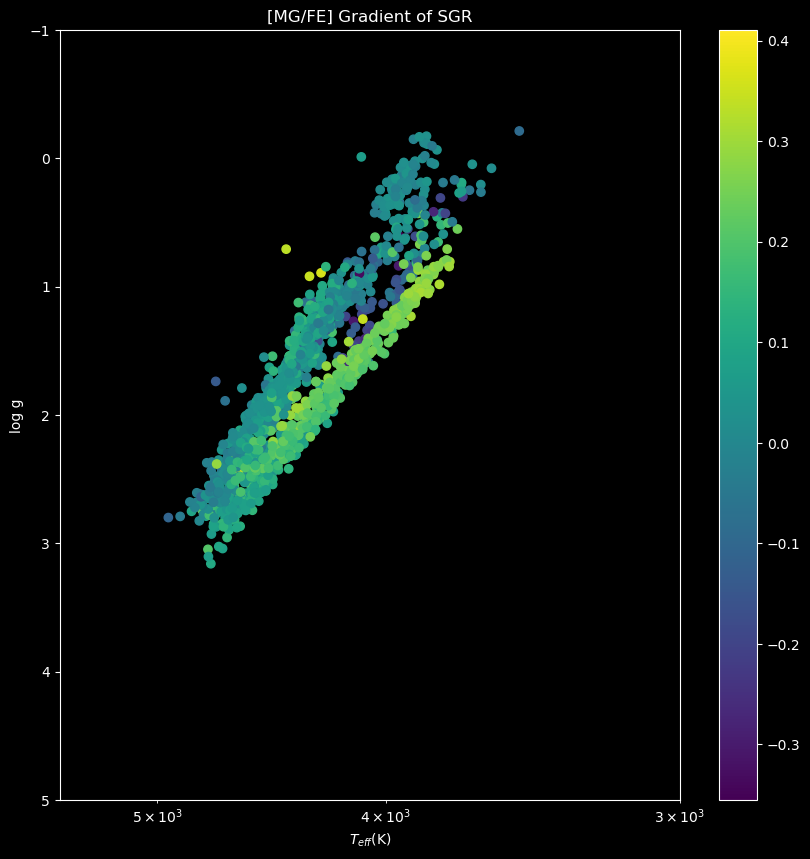

In [20]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(10,10))

x=plt.scatter(data['TEFF'], data['LOGG'], c= data['MG_FE'], cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[MG/FE] Gradient of SGR')
bar = fig.colorbar(x)

plt.xscale('log')
plt.xlim([5.5e3,3e3])
plt.ylim([5,-1])

plt.show()

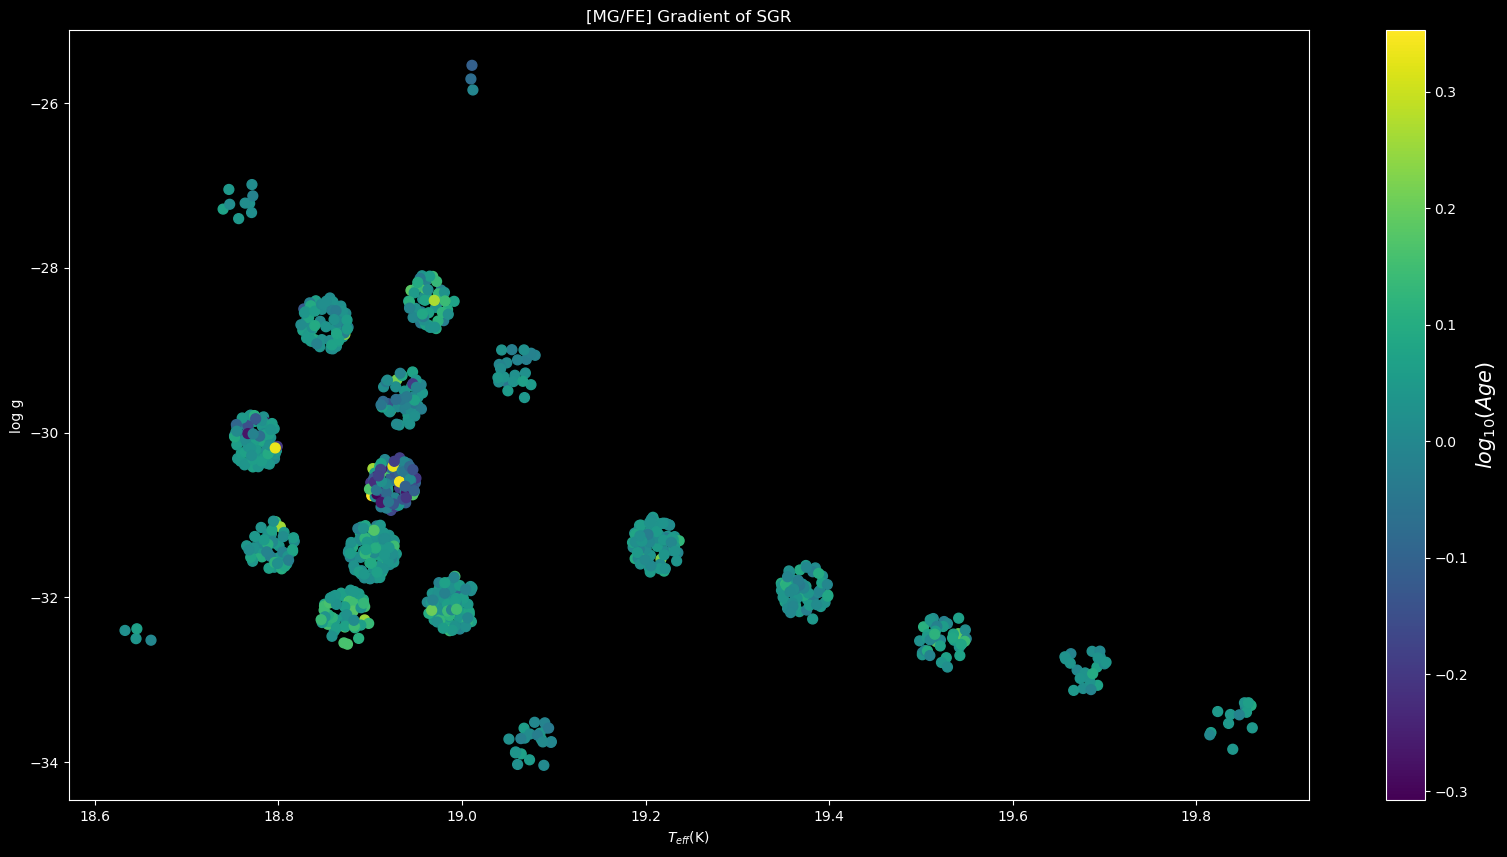

In [21]:
#plot SGR w/o irrelevant data atcorrespondong RA and DEC points 
plt.style.use('dark_background')
fig = plt.figure(figsize=(20,10))

x=plt.scatter(data['RAd'][cut], data['DEd'][cut], c= data['MG_FE'][cut], s=50, cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[MG/FE] Gradient of SGR')

bar = fig.colorbar(x)
bar.set_label('$log_{10} (Age)$', size=15)

plt.show()

In [22]:
# want to signal the central field point for [MG/FE]
major00 = (data['MAJOR'] == 0) & (data['MINOR'] == 0)
m00 = data['MG_FE'][major00]
major00_mean = np.mean(m00)

major02 = (data['MAJOR'] == 2) & (data['MINOR'] == 0)
m02 = data['MG_FE'][major02]
major02_mean = np.mean(m02)

major04 = (data['MAJOR'] == 4 ) & (data['MINOR'] == 0)
m04 = data['MG_FE'][major04]
major04_mean = np.mean(m04)

major06 = (data['MAJOR'] == 6) & (data['MINOR'] == 0)
m06 = data['MG_FE'][major06]
major06_mean = np.mean(m06)

major08 = (data['MAJOR'] == 8 ) & (data['MINOR'] == 0)
m08 = data['MG_FE'][major08]
major08_mean = np.mean(m08)

major10 = (data['MAJOR'] == 10 ) & (data['MINOR'] == 0)
m10 = data['MG_FE'][major10]
major10_mean = np.mean(m10)

major12 = (data['MAJOR'] == 12 ) & (data['MINOR'] == 0)
m12 = data['MG_FE'][major12]
major12_mean = np.mean(m12)

minor_01= (data['MAJOR'] == 0) & (data['MINOR'] == 1)
m_01 = data['MG_FE'][minor_01]
minor_01_mean = np.mean(m_01)

minor_02= (data['MAJOR'] == 0) & (data['MINOR'] == 2)
m_02 = data['MG_FE'][minor_02]
minor_02_mean = np.mean(m_02)

minor_05= (data['MAJOR'] == 0) & (data['MINOR'] == 5)
m_05 = data['MG_FE'][minor_05]
minor_05_mean = np.mean(m_05)

major_m_02 = (data['MAJOR'] == -2) & (data['MINOR'] == 0)
mm_02 = data['MG_FE'][major_m_02]
major_m_02_mean = np.mean(mm_02)

minor_m_01= (data['MAJOR'] == 0) & (data['MINOR'] == -1)
m_m01 = data['MG_FE'][minor_m_01]
minor_m_01_mean = np.mean(m_m01)

minor_m_02= (data['MAJOR'] == 0) & (data['MINOR'] == -2)
m_m02 = data['MG_FE'][minor_m_02]
minor_m_02_mean = np.mean(m_m02)

minor_m_03= (data['MAJOR'] == 0) & (data['MINOR'] == -3)
m_m03 = data['MG_FE'][minor_m_03]
minor_m_03_mean = np.mean(m_m03)

SW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == -2)
SW4 = data['MG_FE'][SW_04]
SW_04_mean = np.mean(SW4)

NW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == 2)
NW4 = data['MG_FE'][NW_04]
NW_04_mean = np.mean(NW4)

SE_04 = (data['MAJOR'] == 2) & (data['MINOR'] == -2)
SE4 = data['MG_FE'][SE_04]
SE_04_mean = np.mean(SE4)

NE_02 = (data['MAJOR'] == 1.4) & (data['MINOR'] == 1.4)
NE2 = data['MG_FE'][NE_02]
NE_02_mean = np.mean(NE2)

SW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == -1.4)
SW2 = data['MG_FE'][SW_02]
SW_02_mean = np.mean(SW2)

NW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
NW2 = data['MG_FE'][NW_02]
NW_02_mean = np.mean(NW2)

SE_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
SE2 = data['MG_FE'][SE_02]
SE_02_mean = np.mean(SE2)


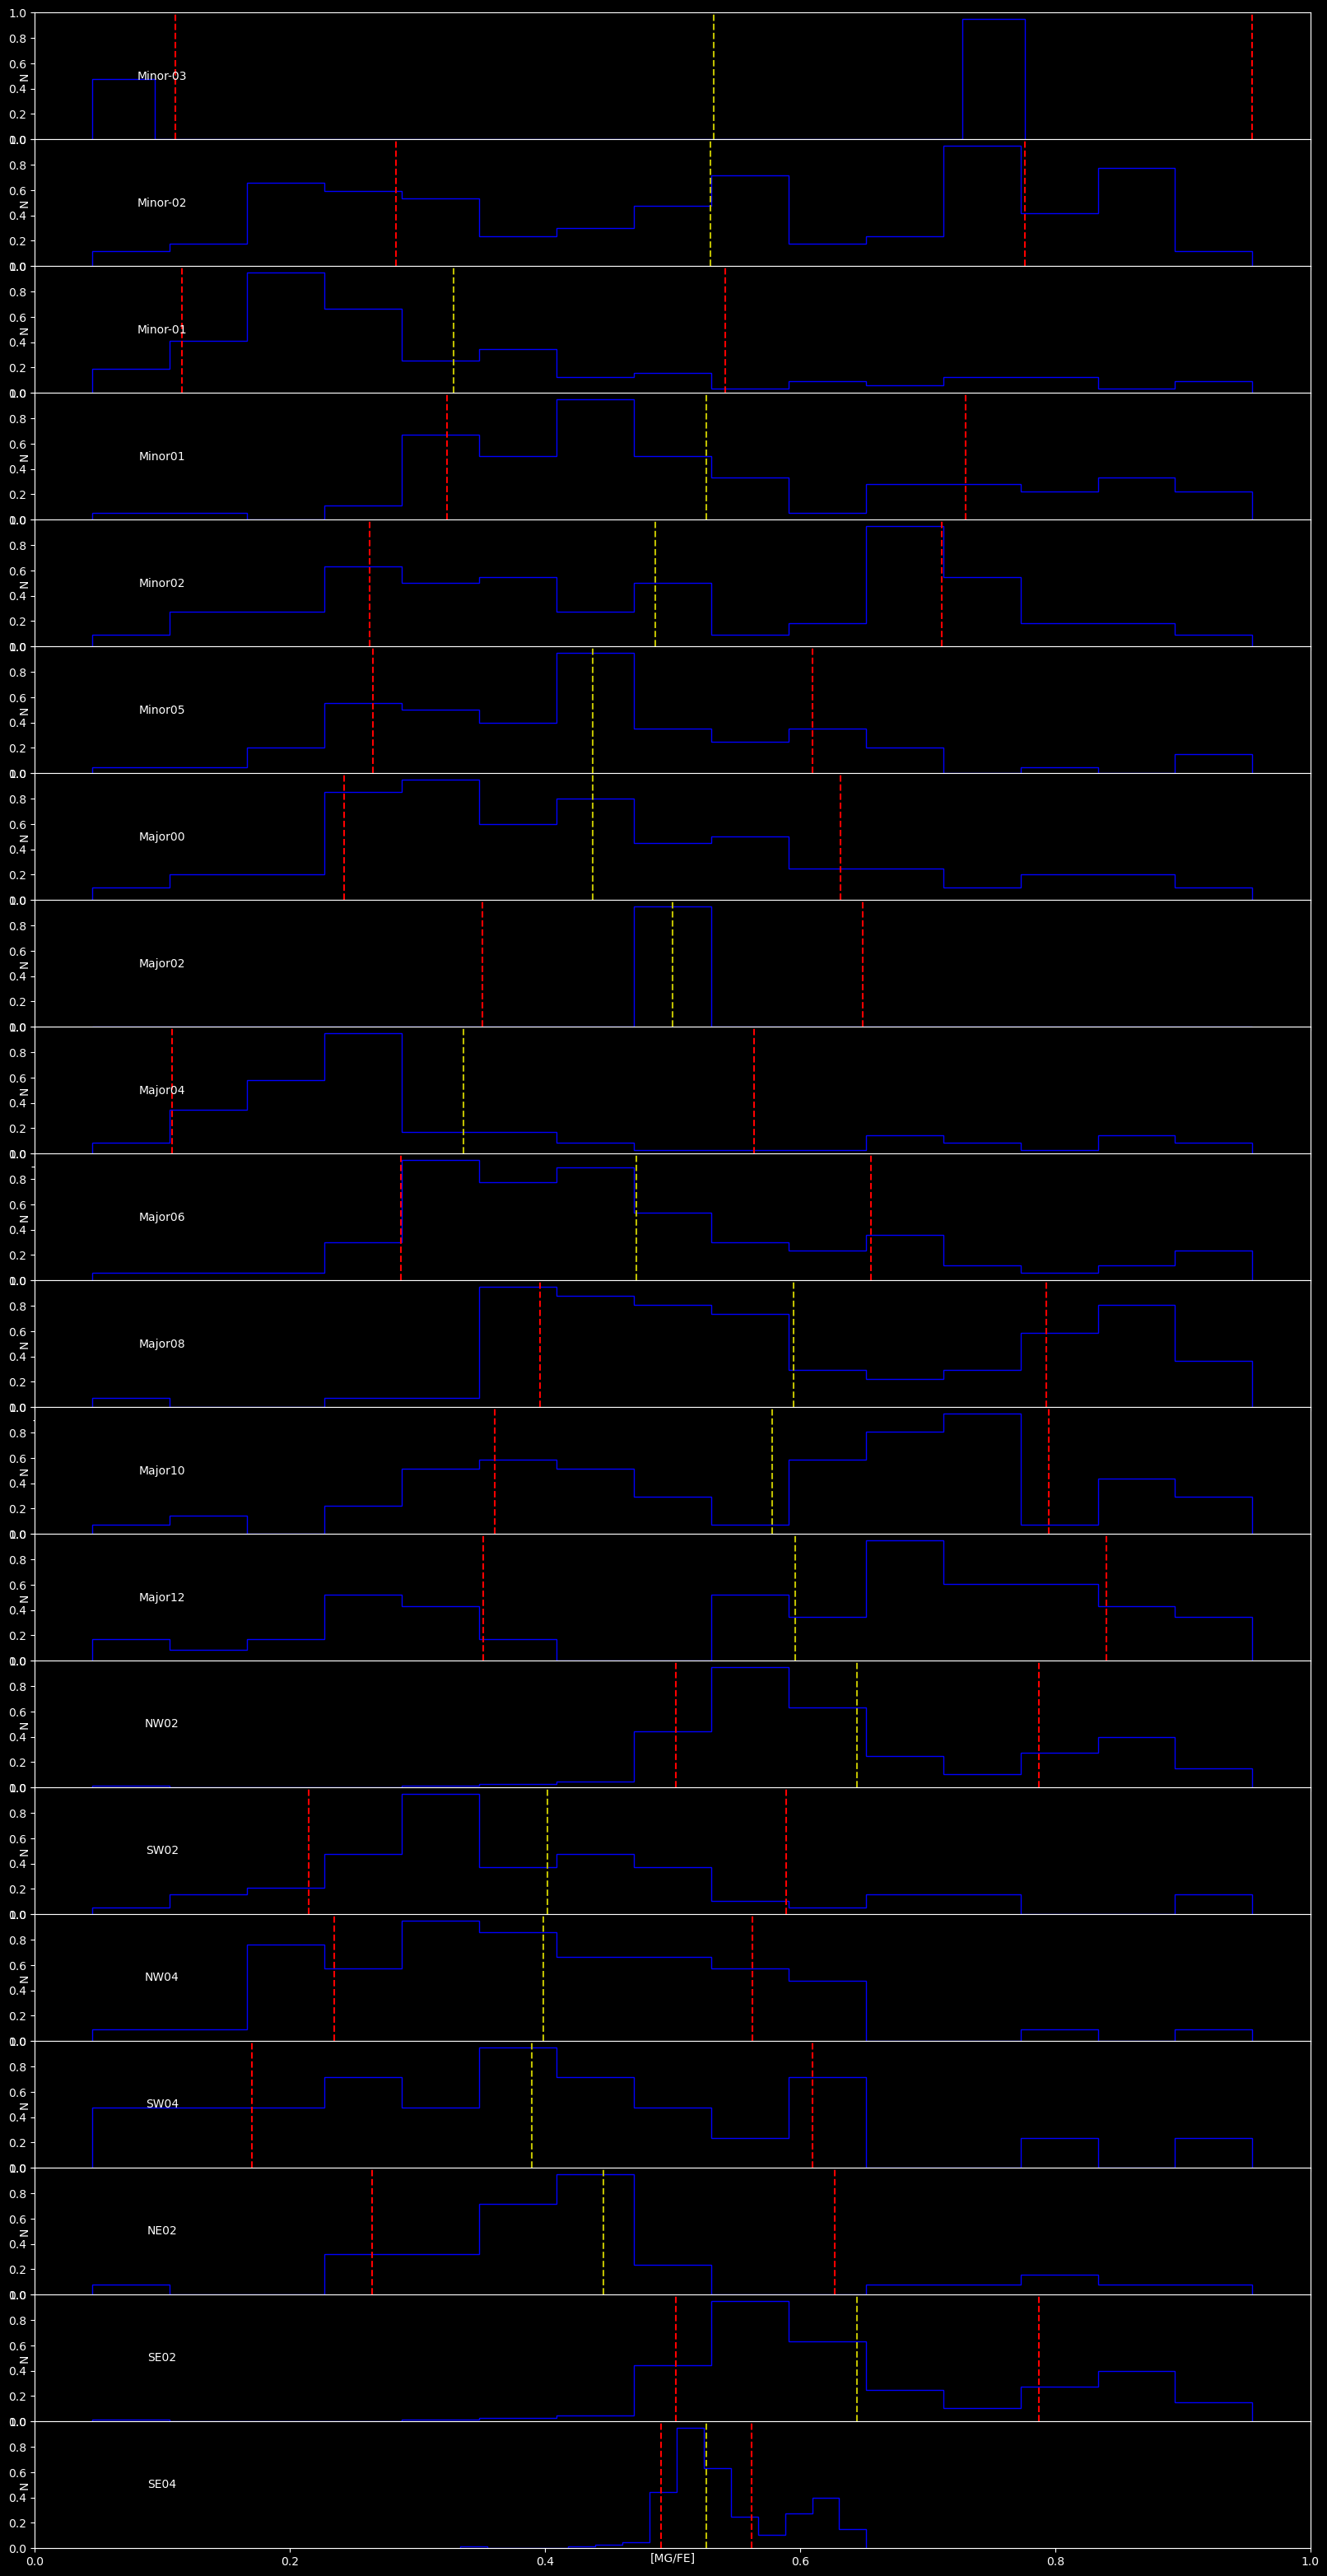

In [23]:
#number of historgrams to display
num_hist = 20

#plot the histograms
plt.style.use('dark_background')
fig, axes = plt.subplots(20, 1, figsize=(20,40), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
###################################################################################
ax1 = fig.add_subplot(20,1,1)
ax1.hist(m_m03,bins=15, histtype='step', color='b')
ax1.text(0.1, 0.5, 'Minor-03', 
         horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax1.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m03)

plt.axvline(minor_m_03_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_03_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_03_mean + sd, c='r', linestyle='dashed')
###################################################################################
ax2 = fig.add_subplot(20,1,2)
ax2.hist(m_m02,bins=15, histtype='step', color='b')
ax2.text(0.1, 0.5, 'Minor-02', 
         horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax2.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m02)

plt.axvline(minor_m_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_02_mean + sd, c='r', linestyle='dashed')

#############################################################################################
#plot the histograms

ax3 = fig.add_subplot(20,1,3)
ax3.hist(m_m01,bins=15, histtype='step', color='b')
ax3.text(0.1, 0.5, 'Minor-01', 
         horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
ax3.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m01)

plt.axvline(minor_m_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_01_mean + sd, c='r', linestyle='dashed')
#####################################################################################################
#plot the histograms

ax4 = fig.add_subplot(20,1,4)
ax4.hist(m_01,bins=15, histtype='step', color='b')
ax4.text(0.1, 0.5, 'Minor01', 
         horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
ax4.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_01_mean + sd, c='r', linestyle='dashed')
#######################################################################################
#plot the histograms

ax5 = fig.add_subplot(20,1,5)
ax5.hist(m_02,bins=15, histtype='step', color='b')
ax5.text(0.1, 0.5, 'Minor02', 
         horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
ax5.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_02)

plt.axvline(minor_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_02_mean + sd, c='r', linestyle='dashed')
#####################################################################################################

ax6 = fig.add_subplot(20,1,6)
ax6.hist(m_05,bins=15, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Minor05', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m_05)

plt.axvline(minor_05_mean, c='y', linestyle='dashed')
plt.axvline(minor_05_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_05_mean + sd, c='r', linestyle='dashed')

#####################################################################################################
ax7 = fig.add_subplot(20,1,7)
ax7.hist(m00,bins=15, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################################################################
ax8 = fig.add_subplot(20,1,8)
ax8.hist(m02,bins=15, histtype='step', color='b')
ax8.text(0.1, 0.5, 'Major02', 
         horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes)
ax8.set_ylabel('N')

#standard deviatian and mean
#sd = statistics.stdev(m02)

plt.axvline(major02_mean, c='y', linestyle='dashed')
plt.axvline(major02_mean - sd, c='r', linestyle='dashed')
plt.axvline(major02_mean+ sd, c='r', linestyle='dashed')
#####################################################################################################
ax9 = fig.add_subplot(20,1,9)
ax9.hist(m04,bins=15, histtype='step', color='b')
ax9.text(0.1, 0.5, 'Major04', 
         horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)
ax9.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m04)

plt.axvline(major04_mean, c='y', linestyle='dashed')
plt.axvline(major04_mean - sd, c='r', linestyle='dashed')
plt.axvline(major04_mean+ sd, c='r', linestyle='dashed')
###################################################################################
ax10 = fig.add_subplot(20,1,10)
ax10.hist(m06,bins=15, histtype='step', color='b')
ax10.text(0.1, 0.5, 'Major06', 
         horizontalalignment='center', verticalalignment='center', transform=ax10.transAxes)
ax10.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m06)

plt.axvline(major06_mean, c='y', linestyle='dashed')
plt.axvline(major06_mean - sd, c='r', linestyle='dashed')
plt.axvline(major06_mean+ sd, c='r', linestyle='dashed')

###############################################################################################
ax11 = fig.add_subplot(20,1,11)
ax11.hist(m08,bins=15, histtype='step', color='b')
ax11.text(0.1, 0.5, 'Major08', 
         horizontalalignment='center', verticalalignment='center', transform=ax11.transAxes)
ax11.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m08)

plt.axvline(major08_mean, c='y', linestyle='dashed')
plt.axvline(major08_mean - sd, c='r', linestyle='dashed')
plt.axvline(major08_mean+ sd, c='r', linestyle='dashed')
###################################################################################################
ax12 = fig.add_subplot(20,1,12)
ax12.hist(m10,bins=15, histtype='step', color='b')
ax12.text(0.1, 0.5, 'Major10', 
         horizontalalignment='center', verticalalignment='center', transform=ax12.transAxes)
ax12.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m10)

plt.axvline(major10_mean, c='y', linestyle='dashed')
plt.axvline(major10_mean - sd, c='r', linestyle='dashed')
plt.axvline(major10_mean+ sd, c='r', linestyle='dashed')

######################################################################################################
ax13 = fig.add_subplot(20,1,13)
ax13.hist(m12,bins=15, histtype='step', color='b')
ax13.text(0.1, 0.5, 'Major12', 
         horizontalalignment='center', verticalalignment='center', transform=ax13.transAxes)
ax13.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m12)

plt.axvline(major12_mean, c='y', linestyle='dashed')
plt.axvline(major12_mean - sd, c='r', linestyle='dashed')
plt.axvline(major12_mean+ sd, c='r', linestyle='dashed')
######################################################################################################
ax14 = fig.add_subplot(20,1,14)
ax14.hist(NW2,bins=15, histtype='step', color='b')
ax14.text(0.1, 0.5, 'NW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes)
ax14.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NW2)

plt.axvline(NW_02_mean, c='y', linestyle='dashed')
plt.axvline(NW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax15 = fig.add_subplot(20,1,15)
ax15.hist(SW2,bins=15, histtype='step', color='b')
ax15.text(0.1, 0.5, 'SW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax15.transAxes)
ax15.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SW2)

plt.axvline(SW_02_mean, c='y', linestyle='dashed')
plt.axvline(SW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax16 = fig.add_subplot(20,1,16)
ax16.hist(NW4,bins=15, histtype='step', color='b')
ax16.text(0.1, 0.5, 'NW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax16.transAxes)
ax16.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NW4)

plt.axvline(NW_04_mean, c='y', linestyle='dashed')
plt.axvline(NW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_04_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax17 = fig.add_subplot(20,1,17)
ax17.hist(SW4,bins=15, histtype='step', color='b')
ax17.text(0.1, 0.5, 'SW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes)
ax17.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SW4)

plt.axvline(SW_04_mean, c='y', linestyle='dashed')
plt.axvline(SW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_04_mean + sd, c='r', linestyle='dashed')
######################################################################################################
ax18 = fig.add_subplot(20,1,18)
ax18.hist(NE2,bins=15, histtype='step', color='b')
ax18.text(0.1, 0.5, 'NE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax18.transAxes)
ax18.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NE2)

plt.axvline(NE_02_mean, c='y', linestyle='dashed')
plt.axvline(NE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NE_02_mean + sd, c='r', linestyle='dashed')
#######################################################################################################
ax19 = fig.add_subplot(20,1,19)
ax19.hist(SE2,bins=15, histtype='step', color='b')
ax19.text(0.1, 0.5, 'SE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax19.transAxes)
ax19.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SE2)

plt.axvline(SE_02_mean, c='y', linestyle='dashed')
plt.axvline(SE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_02_mean + sd, c='r', linestyle='dashed')
###################################################################################################

ax20 = fig.add_subplot(20,1,20)
ax20.hist(SE2,bins=15, histtype='step', color='b')
ax20.text(0.1, 0.5, 'SE04', 
         horizontalalignment='center', verticalalignment='center', transform=ax20.transAxes)
ax20.set_ylabel('N')
ax20.set_xlabel('[MG/FE]')

#standard deviatian and mean
sd = statistics.stdev(SE4)

plt.axvline(SE_04_mean, c='y', linestyle='dashed')
plt.axvline(SE_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_04_mean + sd, c='r', linestyle='dashed')

ax20.set_xlim(-1, 1) 
ax20.set_xticks([])

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])
ax7.set_yticks([])
ax8.set_yticks([])
ax9.set_yticks([])
ax10.set_yticks([])
ax11.set_yticks([])
ax12.set_yticks([])
ax13.set_yticks([])
ax14.set_yticks([])
ax15.set_yticks([])
ax16.set_yticks([])
ax17.set_yticks([])
ax18.set_yticks([])
ax19.set_yticks([])
ax20.set_yticks([])


plt.show()

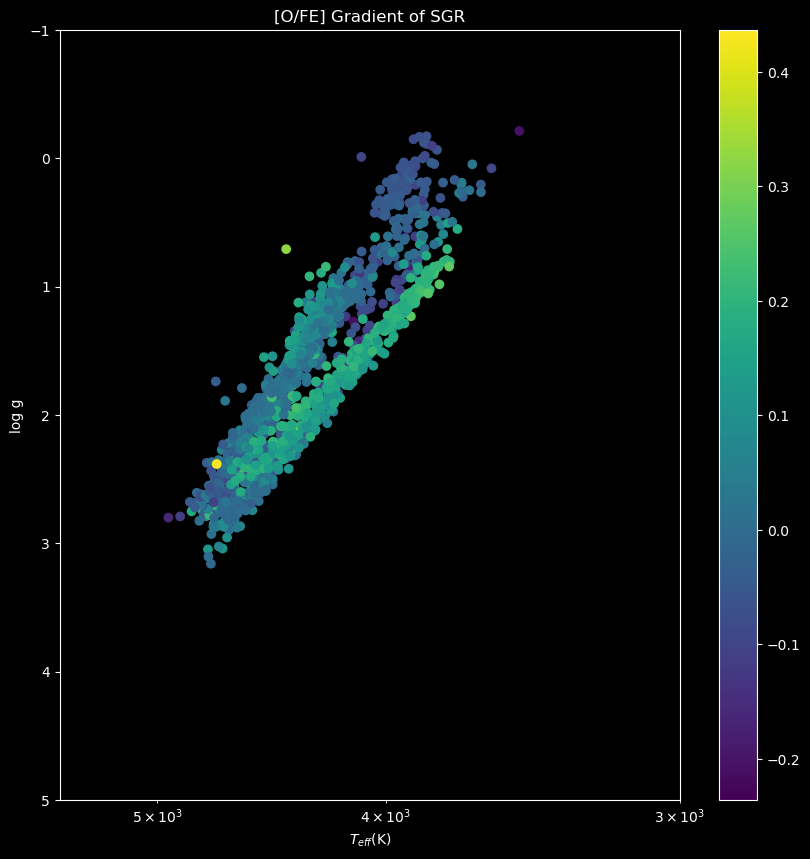

In [24]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(10,10))

x=plt.scatter(data['TEFF'], data['LOGG'], c= data['O_FE'], cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[O/FE] Gradient of SGR')
bar = fig.colorbar(x)

plt.xscale('log')
plt.xlim([5.5e3,3e3])
plt.ylim([5,-1])

plt.show()

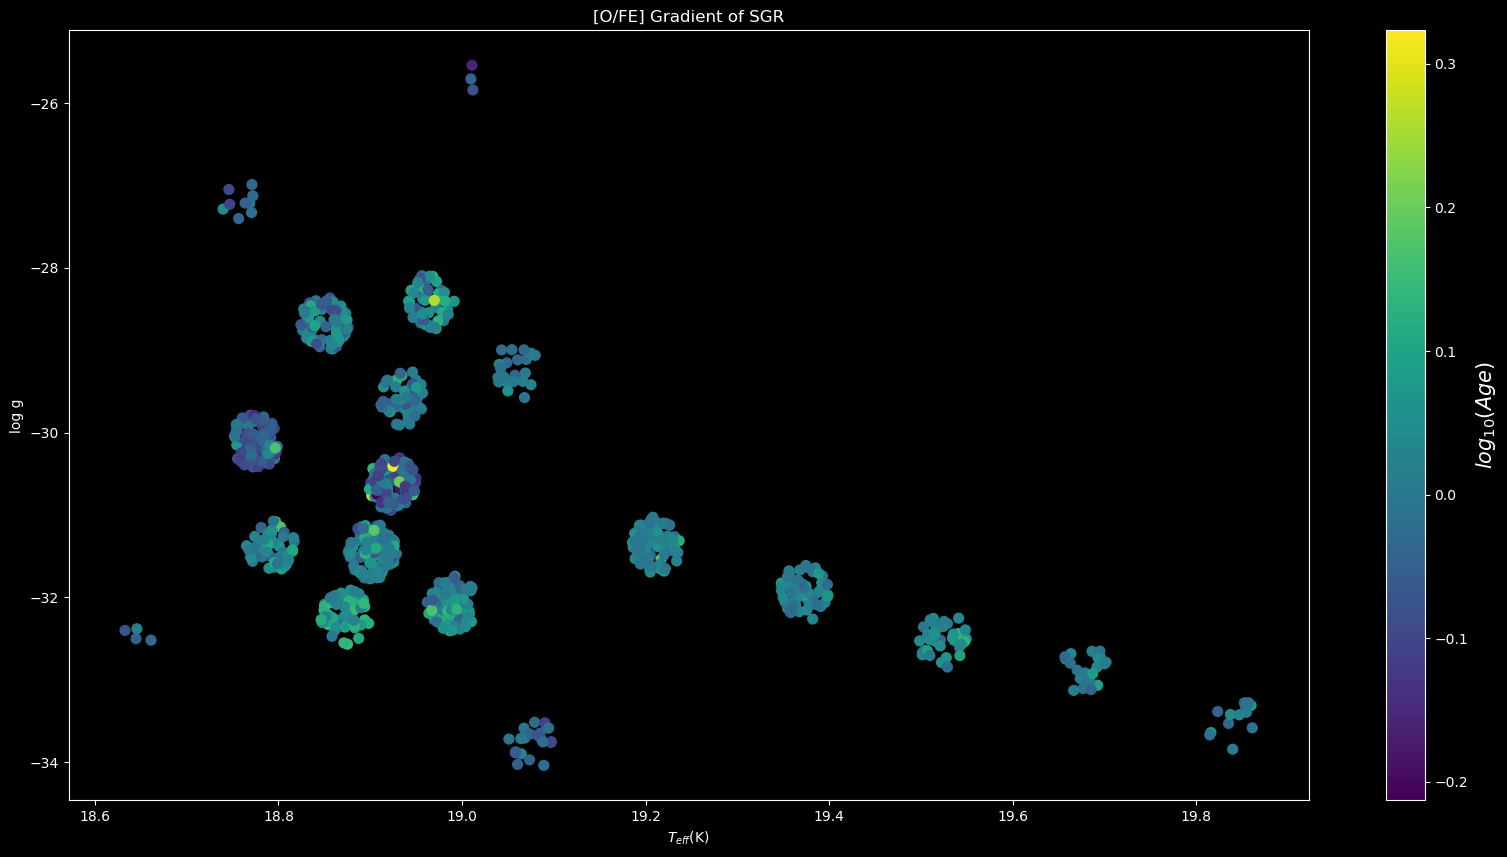

In [25]:
#plot SGR w/o irrelevant data atcorrespondong RA and DEC points 
plt.style.use('dark_background')
fig = plt.figure(figsize=(20,10))

x=plt.scatter(data['RAd'][cut], data['DEd'][cut], c= data['O_FE'][cut], s=50, cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)')
plt.ylabel('log g')
plt.title('[O/FE] Gradient of SGR')

bar = fig.colorbar(x)
bar.set_label('$log_{10} (Age)$', size=15)

plt.show()

In [26]:
major00 = (data['MAJOR'] == 0) & (data['MINOR'] == 0)
m00 = data['O_FE'][major00]
major00_mean = np.mean(m00)

major02 = (data['MAJOR'] == 2) & (data['MINOR'] == 0)
m02 = data['O_FE'][major02]
major02_mean = np.mean(m02)

major04 = (data['MAJOR'] == 4 ) & (data['MINOR'] == 0)
m04 = data['O_FE'][major04]
major04_mean = np.mean(m04)

major06 = (data['MAJOR'] == 6) & (data['MINOR'] == 0)
m06 = data['O_FE'][major06]
major06_mean = np.mean(m06)

major08 = (data['MAJOR'] == 8 ) & (data['MINOR'] == 0)
m08 = data['O_FE'][major08]
major08_mean = np.mean(m08)

major10 = (data['MAJOR'] == 10 ) & (data['MINOR'] == 0)
m10 = data['O_FE'][major10]
major10_mean = np.mean(m10)

major12 = (data['MAJOR'] == 12 ) & (data['MINOR'] == 0)
m12 = data['O_FE'][major12]
major12_mean = np.mean(m12)

minor_01= (data['MAJOR'] == 0) & (data['MINOR'] == 1)
m_01 = data['O_FE'][minor_01]
minor_01_mean = np.mean(m_01)

minor_02= (data['MAJOR'] == 0) & (data['MINOR'] == 2)
m_02 = data['O_FE'][minor_02]
minor_02_mean = np.mean(m_02)

minor_05= (data['MAJOR'] == 0) & (data['MINOR'] == 5)
m_05 = data['O_FE'][minor_05]
minor_05_mean = np.mean(m_05)

major_m_02 = (data['MAJOR'] == -2) & (data['MINOR'] == 0)
mm_02 = data['O_FE'][major_m_02]
major_m_02_mean = np.mean(mm_02)

minor_m_01= (data['MAJOR'] == 0) & (data['MINOR'] == -1)
m_m01 = data['O_FE'][minor_m_01]
minor_m_01_mean = np.mean(m_m01)

minor_m_02= (data['MAJOR'] == 0) & (data['MINOR'] == -2)
m_m02 = data['O_FE'][minor_m_02]
minor_m_02_mean = np.mean(m_m02)

minor_m_03= (data['MAJOR'] == 0) & (data['MINOR'] == -3)
m_m03 = data['O_FE'][minor_m_03]
minor_m_03_mean = np.mean(m_m03)

SW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == -2)
SW4 = data['O_FE'][SW_04]
SW_04_mean = np.mean(SW4)

NW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == 2)
NW4 = data['O_FE'][NW_04]
NW_04_mean = np.mean(NW4)

SE_04 = (data['MAJOR'] == 2) & (data['MINOR'] == -2)
SE4 = data['O_FE'][SE_04]
SE_04_mean = np.mean(SE4)

NE_02 = (data['MAJOR'] == 1.4) & (data['MINOR'] == 1.4)
NE2 = data['O_FE'][NE_02]
NE_02_mean = np.mean(NE2)

SW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == -1.4)
SW2 = data['O_FE'][SW_02]
SW_02_mean = np.mean(SW2)

NW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
NW2 = data['O_FE'][NW_02]
NW_02_mean = np.mean(NW2)

SE_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
SE2 = data['O_FE'][SE_02]
SE_02_mean = np.mean(SE2)



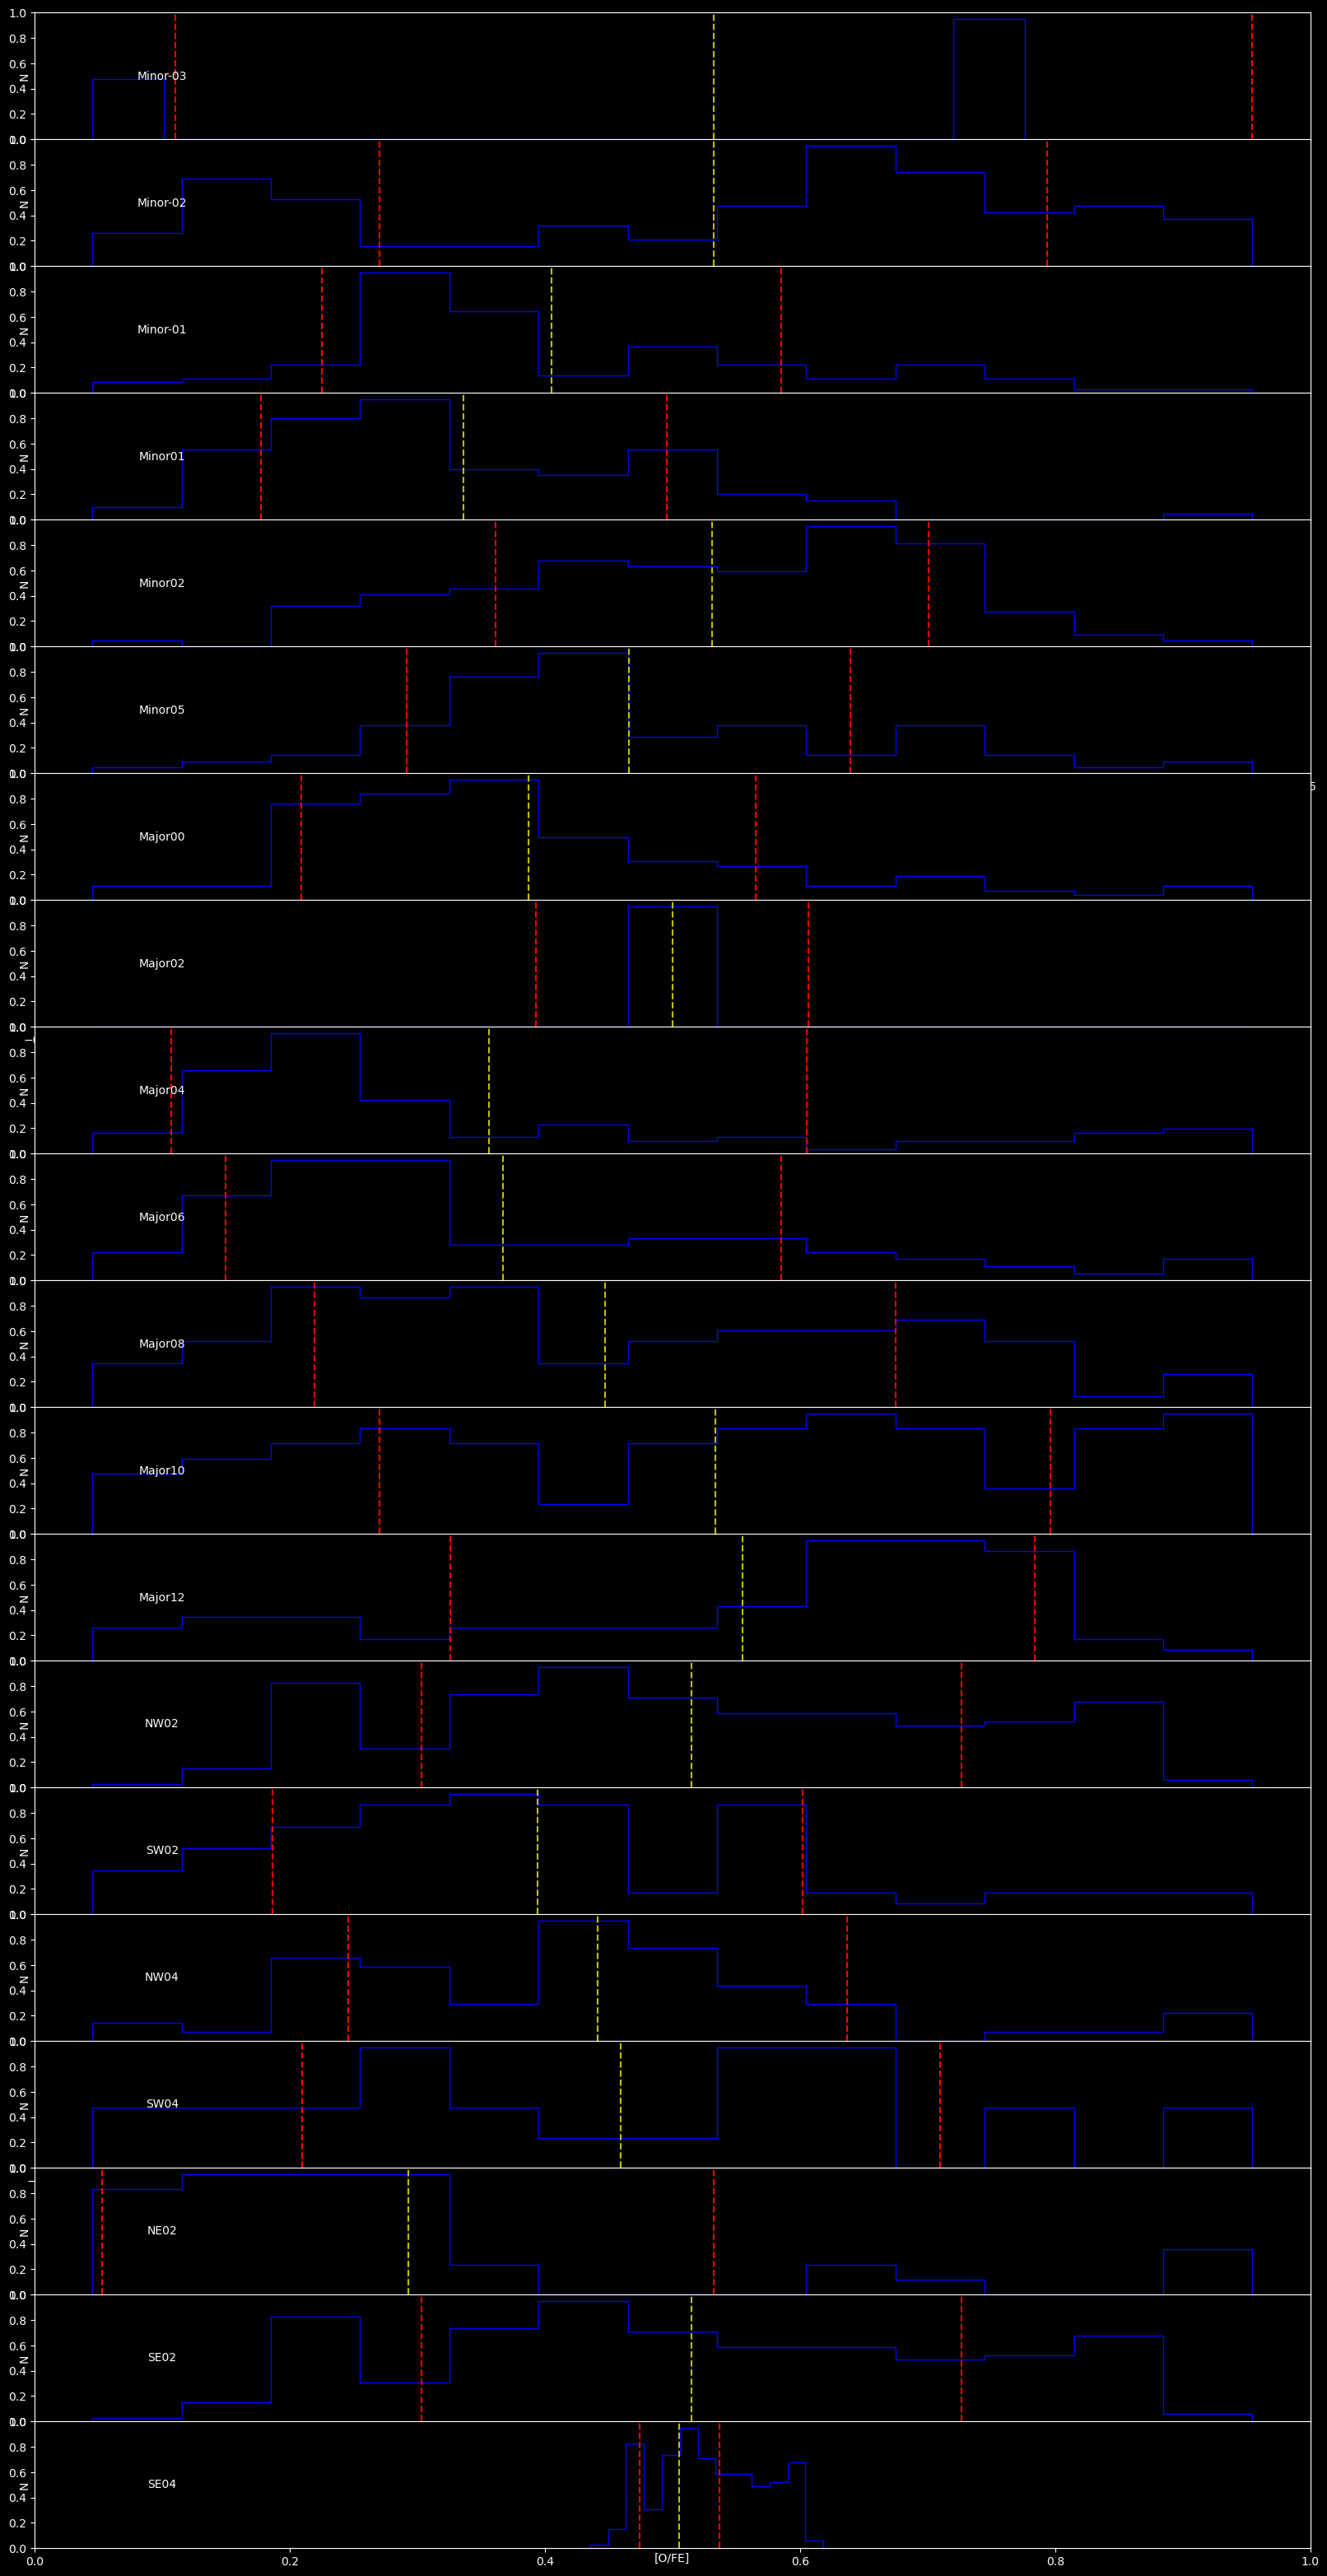

In [27]:
#number of historgrams to display
num_hist = 20

#plot the histograms
plt.style.use('dark_background')
fig, axes = plt.subplots(20, 1, figsize=(20,40), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
###################################################################################
ax1 = fig.add_subplot(20,1,1)
ax1.hist(m_m03,bins=13, histtype='step', color='b')
ax1.text(0.1, 0.5, 'Minor-03', 
         horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax1.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m03)

plt.axvline(minor_m_03_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_03_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_03_mean + sd, c='r', linestyle='dashed')
###################################################################################
ax2 = fig.add_subplot(20,1,2)
ax2.hist(m_m02,bins=13, histtype='step', color='b')
ax2.text(0.1, 0.5, 'Minor-02', 
         horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax2.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m02)

plt.axvline(minor_m_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_02_mean + sd, c='r', linestyle='dashed')

#############################################################################################
#plot the histograms

ax3 = fig.add_subplot(20,1,3)
ax3.hist(m_m01,bins=13, histtype='step', color='b')
ax3.text(0.1, 0.5, 'Minor-01', 
         horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
ax3.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_m01)

plt.axvline(minor_m_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_01_mean + sd, c='r', linestyle='dashed')
#####################################################################################################
#plot the histograms

ax4 = fig.add_subplot(20,1,4)
ax4.hist(m_01,bins=13, histtype='step', color='b')
ax4.text(0.1, 0.5, 'Minor01', 
         horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
ax4.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_01_mean + sd, c='r', linestyle='dashed')
#######################################################################################
#plot the histograms

ax5 = fig.add_subplot(20,1,5)
ax5.hist(m_02,bins=13, histtype='step', color='b')
ax5.text(0.1, 0.5, 'Minor02', 
         horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
ax5.set_ylabel('N')


#standard deviatian and mean
sd = statistics.stdev(m_02)

plt.axvline(minor_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_02_mean + sd, c='r', linestyle='dashed')
#####################################################################################################

ax6 = fig.add_subplot(20,1,6)
ax6.hist(m_05,bins=13, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Minor05', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m_05)

plt.axvline(minor_05_mean, c='y', linestyle='dashed')
plt.axvline(minor_05_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_05_mean + sd, c='r', linestyle='dashed')

#####################################################################################################
ax7 = fig.add_subplot(20,1,7)
ax7.hist(m00,bins=13, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################################################################
ax8 = fig.add_subplot(20,1,8)
ax8.hist(m02,bins=13, histtype='step', color='b')
ax8.text(0.1, 0.5, 'Major02', 
         horizontalalignment='center', verticalalignment='center', transform=ax8.transAxes)
ax8.set_ylabel('N')

#standard deviatian and mean
#sd = statistics.stdev(m02)

plt.axvline(major02_mean, c='y', linestyle='dashed')
plt.axvline(major02_mean - sd, c='r', linestyle='dashed')
plt.axvline(major02_mean+ sd, c='r', linestyle='dashed')
#####################################################################################################
ax9 = fig.add_subplot(20,1,9)
ax9.hist(m04,bins=13, histtype='step', color='b')
ax9.text(0.1, 0.5, 'Major04', 
         horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)
ax9.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m04)

plt.axvline(major04_mean, c='y', linestyle='dashed')
plt.axvline(major04_mean - sd, c='r', linestyle='dashed')
plt.axvline(major04_mean+ sd, c='r', linestyle='dashed')
###################################################################################
ax10 = fig.add_subplot(20,1,10)
ax10.hist(m06,bins=13, histtype='step', color='b')
ax10.text(0.1, 0.5, 'Major06', 
         horizontalalignment='center', verticalalignment='center', transform=ax10.transAxes)
ax10.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m06)

plt.axvline(major06_mean, c='y', linestyle='dashed')
plt.axvline(major06_mean - sd, c='r', linestyle='dashed')
plt.axvline(major06_mean+ sd, c='r', linestyle='dashed')

###############################################################################################
ax11 = fig.add_subplot(20,1,11)
ax11.hist(m08,bins=13, histtype='step', color='b')
ax11.text(0.1, 0.5, 'Major08', 
         horizontalalignment='center', verticalalignment='center', transform=ax11.transAxes)
ax11.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m08)

plt.axvline(major08_mean, c='y', linestyle='dashed')
plt.axvline(major08_mean - sd, c='r', linestyle='dashed')
plt.axvline(major08_mean+ sd, c='r', linestyle='dashed')
###################################################################################################
ax12 = fig.add_subplot(20,1,12)
ax12.hist(m10,bins=13, histtype='step', color='b')
ax12.text(0.1, 0.5, 'Major10', 
         horizontalalignment='center', verticalalignment='center', transform=ax12.transAxes)
ax12.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m10)

plt.axvline(major10_mean, c='y', linestyle='dashed')
plt.axvline(major10_mean - sd, c='r', linestyle='dashed')
plt.axvline(major10_mean+ sd, c='r', linestyle='dashed')

######################################################################################################
ax13 = fig.add_subplot(20,1,13)
ax13.hist(m12,bins=13, histtype='step', color='b')
ax13.text(0.1, 0.5, 'Major12', 
         horizontalalignment='center', verticalalignment='center', transform=ax13.transAxes)
ax13.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(m12)

plt.axvline(major12_mean, c='y', linestyle='dashed')
plt.axvline(major12_mean - sd, c='r', linestyle='dashed')
plt.axvline(major12_mean+ sd, c='r', linestyle='dashed')
######################################################################################################
ax14 = fig.add_subplot(20,1,14)
ax14.hist(NW2,bins=13, histtype='step', color='b')
ax14.text(0.1, 0.5, 'NW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes)
ax14.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NW2)

plt.axvline(NW_02_mean, c='y', linestyle='dashed')
plt.axvline(NW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax15 = fig.add_subplot(20,1,15)
ax15.hist(SW2,bins=13, histtype='step', color='b')
ax15.text(0.1, 0.5, 'SW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax15.transAxes)
ax15.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SW2)

plt.axvline(SW_02_mean, c='y', linestyle='dashed')
plt.axvline(SW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax16 = fig.add_subplot(20,1,16)
ax16.hist(NW4,bins=13, histtype='step', color='b')
ax16.text(0.1, 0.5, 'NW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax16.transAxes)
ax16.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NW4)

plt.axvline(NW_04_mean, c='y', linestyle='dashed')
plt.axvline(NW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_04_mean + sd, c='r', linestyle='dashed')
##################################################################################################
ax17 = fig.add_subplot(20,1,17)
ax17.hist(SW4,bins=13, histtype='step', color='b')
ax17.text(0.1, 0.5, 'SW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes)
ax17.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SW4)

plt.axvline(SW_04_mean, c='y', linestyle='dashed')
plt.axvline(SW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_04_mean + sd, c='r', linestyle='dashed')
######################################################################################################
ax18 = fig.add_subplot(20,1,18)
ax18.hist(NE2,bins=13, histtype='step', color='b')
ax18.text(0.1, 0.5, 'NE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax18.transAxes)
ax18.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(NE2)

plt.axvline(NE_02_mean, c='y', linestyle='dashed')
plt.axvline(NE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NE_02_mean + sd, c='r', linestyle='dashed')
#######################################################################################################
ax19 = fig.add_subplot(20,1,19)
ax19.hist(SE2,bins=13, histtype='step', color='b')
ax19.text(0.1, 0.5, 'SE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax19.transAxes)
ax19.set_ylabel('N')

#standard deviatian and mean
sd = statistics.stdev(SE2)

plt.axvline(SE_02_mean, c='y', linestyle='dashed')
plt.axvline(SE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_02_mean + sd, c='r', linestyle='dashed')
###################################################################################################

ax20 = fig.add_subplot(20,1,20)
ax20.hist(SE2,bins=13, histtype='step', color='b')
ax20.text(0.1, 0.5, 'SE04', 
         horizontalalignment='center', verticalalignment='center', transform=ax20.transAxes)
ax20.set_ylabel('N')
ax20.set_xlabel('[O/FE]')

#standard deviatian and mean
sd = statistics.stdev(SE4)

plt.axvline(SE_04_mean, c='y', linestyle='dashed')
plt.axvline(SE_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_04_mean + sd, c='r', linestyle='dashed')

ax20.set_xlim(-1, 1) 
ax20.set_xticks([])

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])
ax7.set_yticks([])
ax8.set_yticks([])
ax9.set_yticks([])
ax10.set_yticks([])
ax11.set_yticks([])
ax12.set_yticks([])
ax13.set_yticks([])
ax14.set_yticks([])
ax15.set_yticks([])
ax16.set_yticks([])
ax17.set_yticks([])
ax18.set_yticks([])
ax19.set_yticks([])
ax20.set_yticks([])


plt.show()

In [28]:
#
mean_tot = [major00_mean, major04_mean, major06_mean, major08_mean, major10_mean, major12_mean, 
            minor_01_mean, minor_02_mean, minor_05_mean, major_m_02_mean, minor_m_01_mean,
           minor_m_02_mean, minor_m_03_mean,SW_04_mean, NW_04_mean, SE_04_mean,
            NE_02_mean, SW_02_mean, NW_02_mean, SE_02_mean ]

radial_dis = [110.9, 10.7, 234.0, 363.2, 486.5, 610.9, 740.2]

m00_sd = statistics.stdev(m00)
m04_sd = statistics.stdev(m04)
m06_sd = statistics.stdev(m06)
m08_sd = statistics.stdev(m08)
m10_sd = statistics.stdev(m10)
m12_sd = statistics.stdev(m12)

sigma_tot = [m00_sd, m04_sd, m06_sd, m08_sd, m10_sd, m12_sd]

In [53]:
data.dtype

dtype([('2MASS_ID', 'S19'), ('RA', 'S7'), ('DEC', 'S12'), ('RAd', '<f8'), ('DEd', '<f8'), ('GL', '<f8'), ('GB', '<f8'), ('UTD', 'S9'), ('FILE', 'S35'), ('V_HEL', '<f8'), ('TDR', '<f8'), ('CORR', '<f8'), ('E_RV', '<f8'), ('SIGMA', '<f8'), ('NUM', '<i4'), ('CA1', '<f8'), ('E_CA1', '<f8'), ('CA2', '<f8'), ('E_CA2', '<f8'), ('CA3', '<f8'), ('E_CA3', '<f8'), ('RA2', 'S7'), ('2Dec', 'S12'), ('tmpR', '<f8'), ('Lambda', '<i4'), ('Beta', '<i4'), ('V_LSR', '<f8'), ('V_GSR', '<f8'), ('RA3', '<f8'), ('3Dec', '<f8'), ('J', '<f8'), ('H', '<f8'), ('K', '<f8'), ('E_J', '<f8'), ('E_H', '<f8'), ('E_K', '<f8'), ('rdflg', '<i4'), ('ccflg', 'S3'), ('phqu', 'S3'), ('prx', '<f8'), ('2Mdate', 'S10'), ('d_opt', '<f8'), ('p_opt', '<i4'), ('a', 'S1'), ('ermaj', '<f8'), ('id', '<i4'), ('R', '<f8'), ('ER', '<f8'), ('2MASS', 'S16'), ('RA4', 'S7'), ('4Dec', 'S12'), ('JNK1', '<f8'), ('JNK2', '<f8'), ('JNK3', '<f8'), ('JNK4', '<f8'), ('JNK5', '<f8'), ('JNK6', '<f8'), ('JNK7', '<f8'), ('JNK8', '<f8'), ('JNK9', '<f8'), 

array([0., 0., 0., ..., 1., 1., 1.])

ValueError: x and y must be the same size

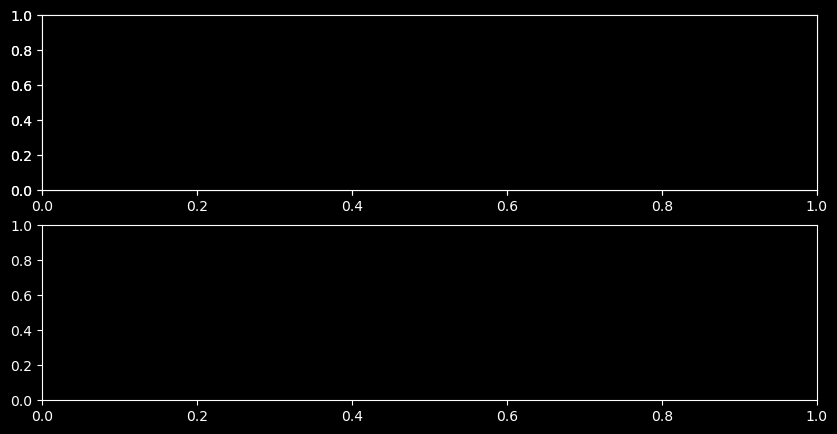